### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [5]:
# Готово
# в predict как я понимаю просто умножение весов на вход. А где свободный член?

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [ ]:
# Готово
# Поздно лучше, чем никогда. Оказывается у нас это уже реализованно в классе class LearningRate. А я заново сделал
# Значит можно везде убрать и оставить только lr

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [8]:
# Готово

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [10]:
# Готово

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [11]:
# Готово

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

In [30]:
# Готово
# Вот и ответ где свободный член)

## Задание 3. Проверка кода (0 баллов)

In [175]:
%load_ext autoreload

In [176]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

In [6]:
# Готово
# Получается мы проверили только размерности всех выходов, но по качеству пока что никакой ясности

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



### Считаем данные и базовые характеристики оценим

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [2]:
# непривычно работать с data
df = pd.read_csv('autos.csv')

In [3]:
df.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

In [4]:
# Пропущенных значений нет - отлично
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [5]:
# в цене возможны выбросы большой цены
df.describe()

powerPS      kilometer  autoAgeMonths          price
count  241190.000000  241190.000000  241190.000000  241190.000000
mean      131.271628  123766.677723     144.768676    6887.741892
std        60.622613   39825.955933      73.092598    8024.451993
min        51.000000    5000.000000       1.000000       1.000000
25%        90.000000  100000.000000      92.000000    1750.000000
50%       120.000000  150000.000000     140.000000    4100.000000
75%       160.000000  150000.000000     192.000000    8999.000000
max       589.000000  150000.000000     600.000000   99999.000000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [6]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths', 'price']
other = []

### **Визуализация распределения целевой переменной**

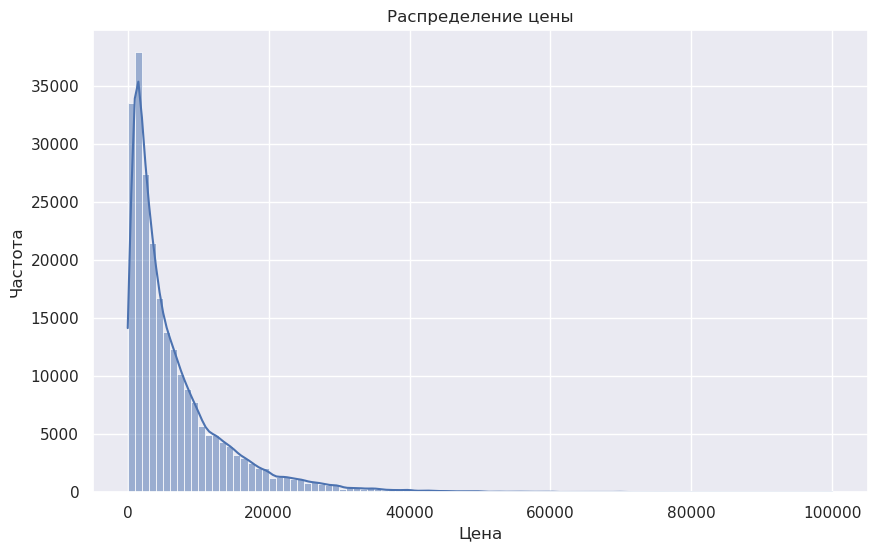

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

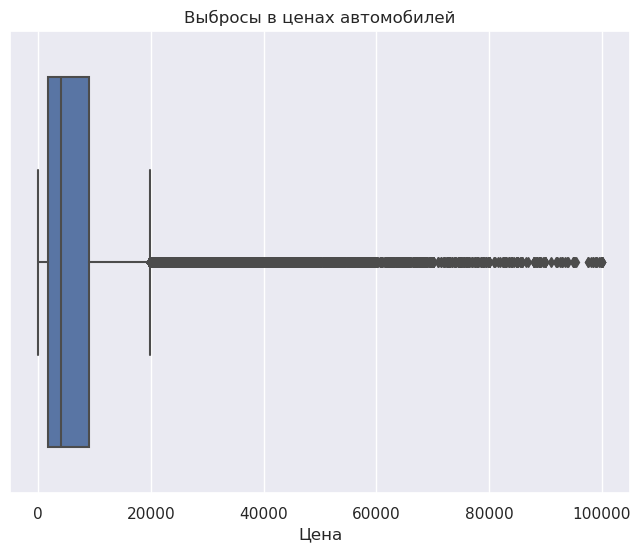

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Выбросы в ценах автомобилей')
plt.xlabel('Цена')
plt.show()

In [9]:
# Очень тяжелый правых хвост. понадобится логарифмирование. Возможно можно будет его 
# укоротить, убрав выбросы с высокой ценой

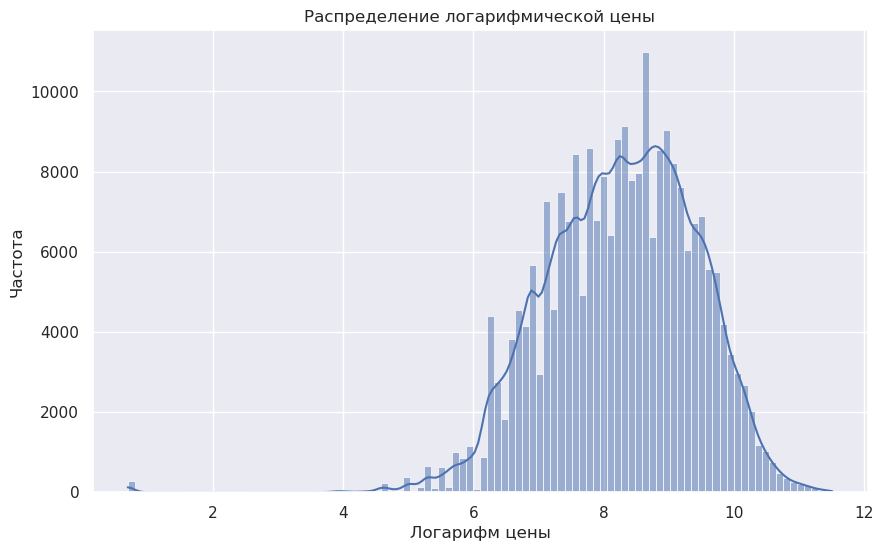

In [10]:
df['log_price'] = np.log1p(df['price'])

# Гистограмма после логарифмического преобразования
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Распределение логарифмической цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

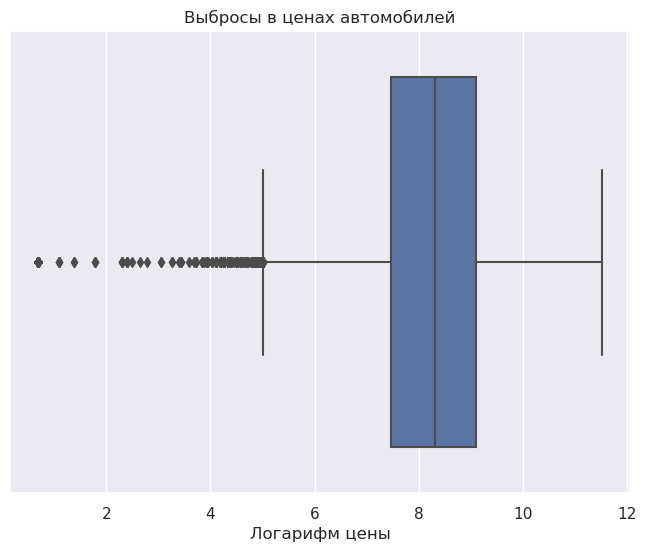

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['log_price'])
plt.title('Выбросы в ценах автомобилей')
plt.xlabel('Логарифм цены')
plt.show()

In [12]:
# После логарифмирования стали заметны аномально низкие цены

In [13]:
# Вычисление IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 3 * IQR

# Фильтрация выбросов
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Вывод выбросов
print(f"Количество выбросов: {outliers.shape[0]}")


Количество выбросов: 4575


In [14]:
df[df['price'] > upper_bound].brand.value_counts().head(5)

audi             1033
bmw               928
mercedes_benz     872
porsche           834
volkswagen        494
Name: brand, dtype: int64

In [15]:
df.brand.value_counts().head(5)

volkswagen       49087
bmw              29194
mercedes_benz    25465
audi             23891
opel             23809
Name: brand, dtype: int64

In [16]:
# Смотрел для коэффициента в 5
# df[(df['price'] > upper_bound) & (df['brand'].isin(['smart', 'honda', 'fiat', 'nissan', 'lancia', 'renault', 'chevrolet', 'ford', 'toyota']))]

In [17]:
# Из-за большого перекоса цен в большую сторону находится много выбросов с использованием 
# коэффициета 1.5 (6.5% выборки). При этом выбросы с минимальной ценой не обнаружены. 
# Можно было бы безжалостно удалить эти выбросы или увеличить коэффициент до 3 (в таком случае это бует 2%)
# Если заглянуть глубже и посмотреть наполнение данных для таких цен, то видно, что это просто дорогие машины, 
# такие как мерседес, бмв, порш (причем топовые модели). Однако было замечено несколько однозначных выбросов, например
# ниссан x-trail, smart т.п. Выписал их id для дальнейшего удаления в следующем пункте
# high_price_id = [222159, 92147, 15854] 

# Но принято решение не рисковать и удалить все значения больше 3 коэффициента, дабы не давать нашей бедной модели большие значения

In [18]:
# Вычисление IQR
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_log = Q1 - 1.5 * IQR
upper_bound_log = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers_log  = df[(df['log_price'] < lower_bound_log) | (df['log_price'] > upper_bound_log)]

# Вывод выбросов
print(f"Количество выбросов: {outliers_log.shape[0]}")

Количество выбросов: 791


In [19]:
# Гораздо интереснее оказалось посмотреть аномально низкие цены. Количество маленькое (меньше процента от выборки)
# и цены оцень маленькие, так что данные выбросы можно безжалостно удалить

### **Удаление выбросов**

In [20]:
# df = df.drop(index=high_price_id)
df = df[(df['log_price'] >= lower_bound_log) & (df['log_price'] <= upper_bound_log)]
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [21]:
len(df)

235824

### **Исследование данных**

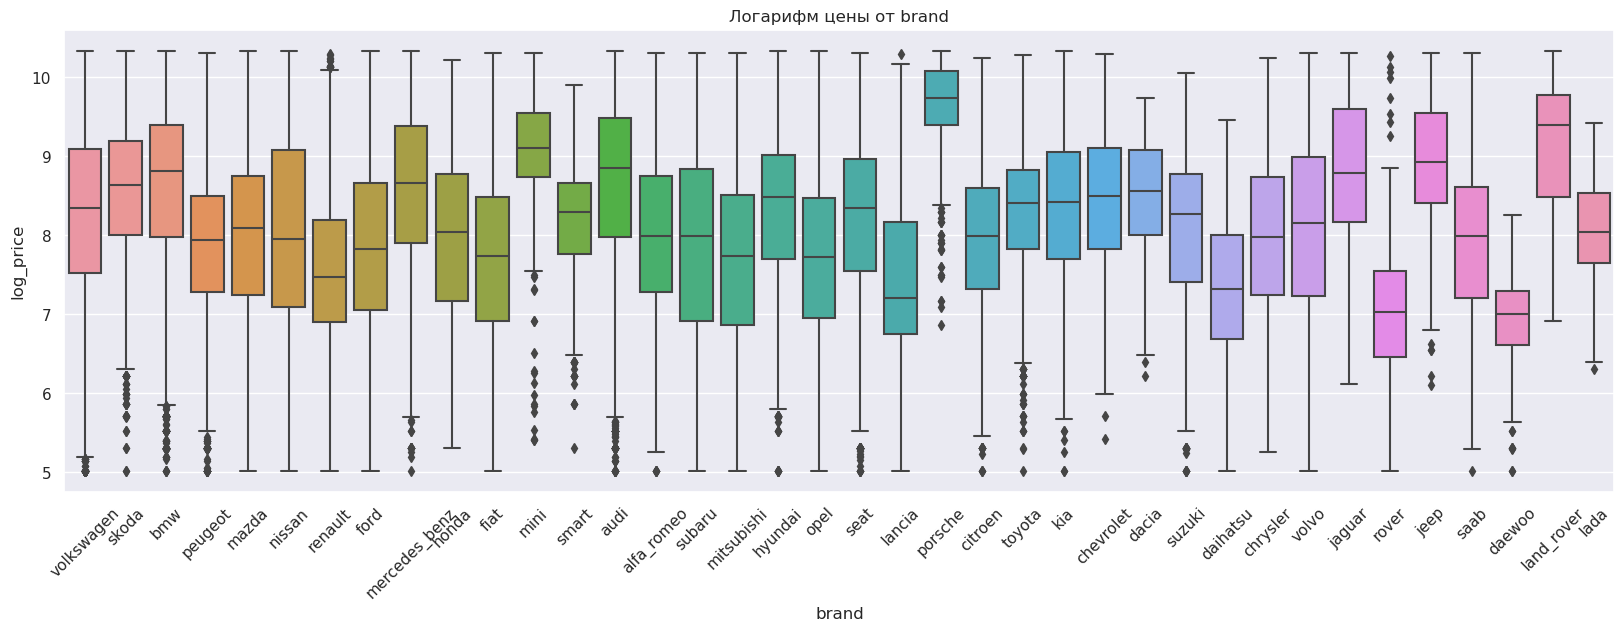

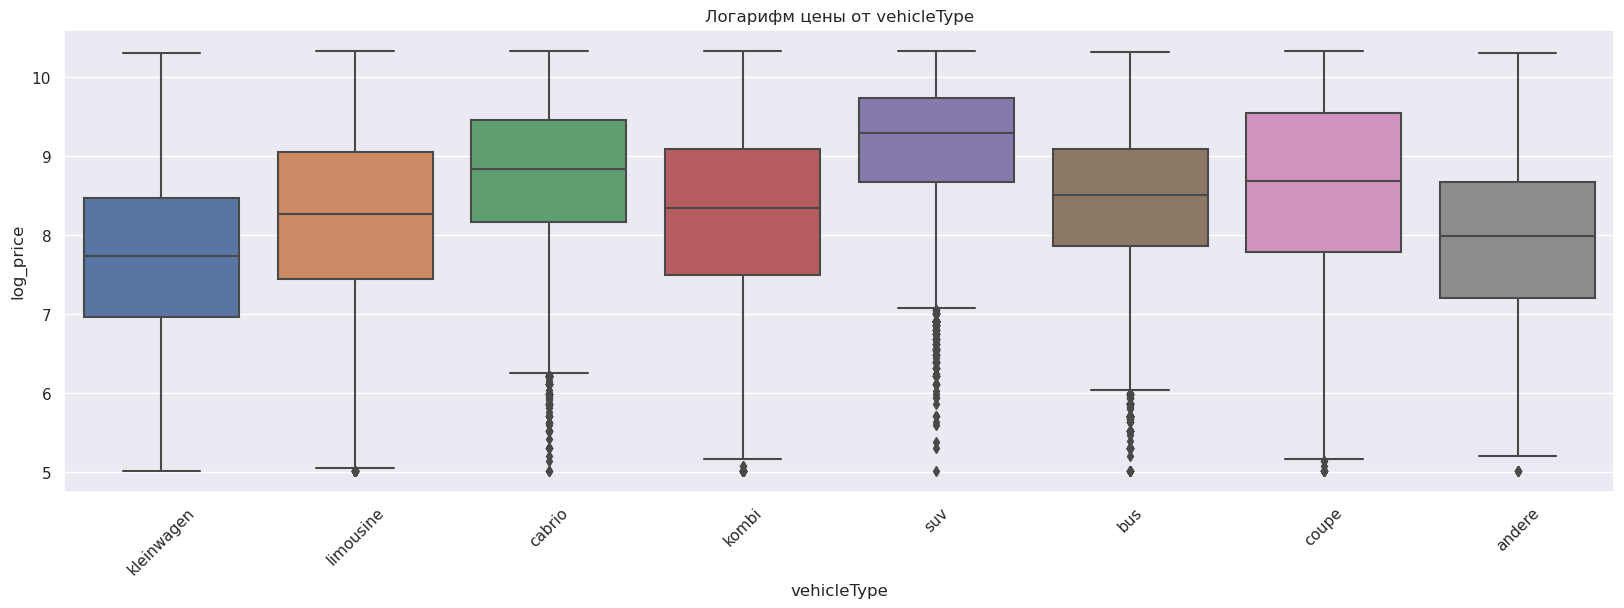

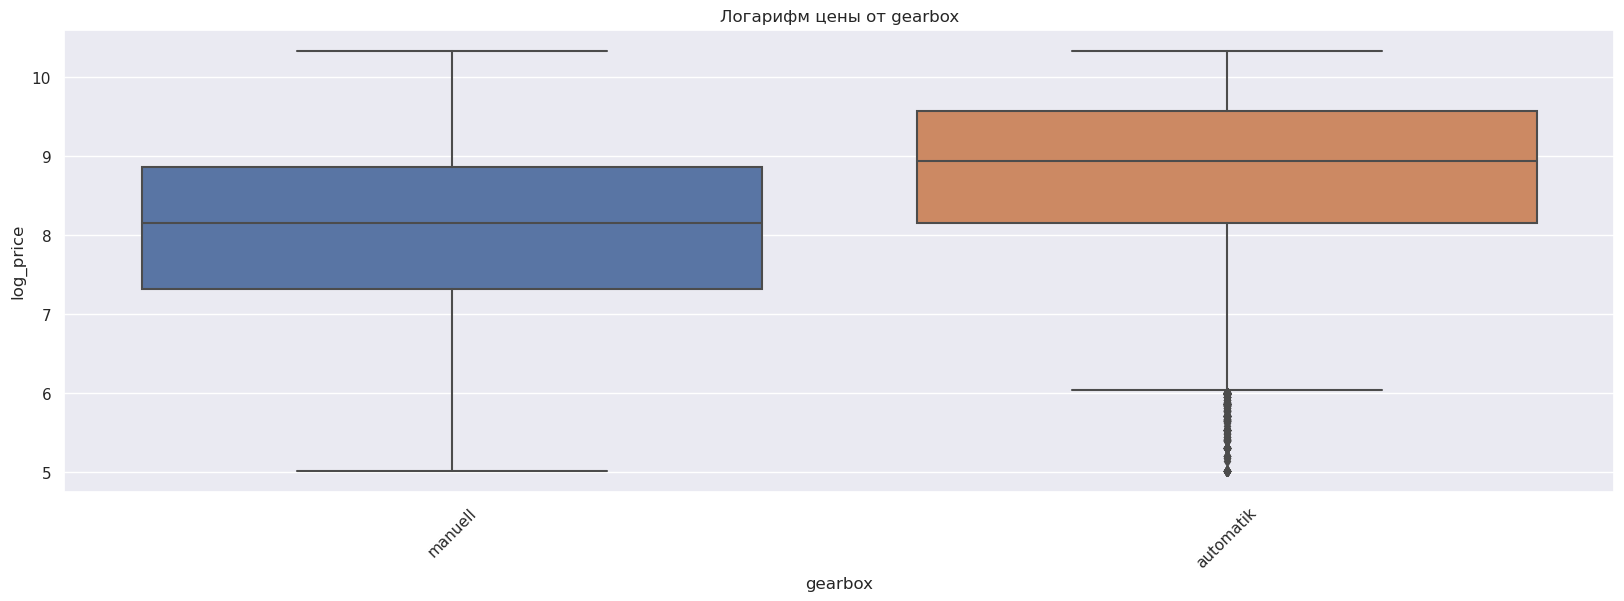

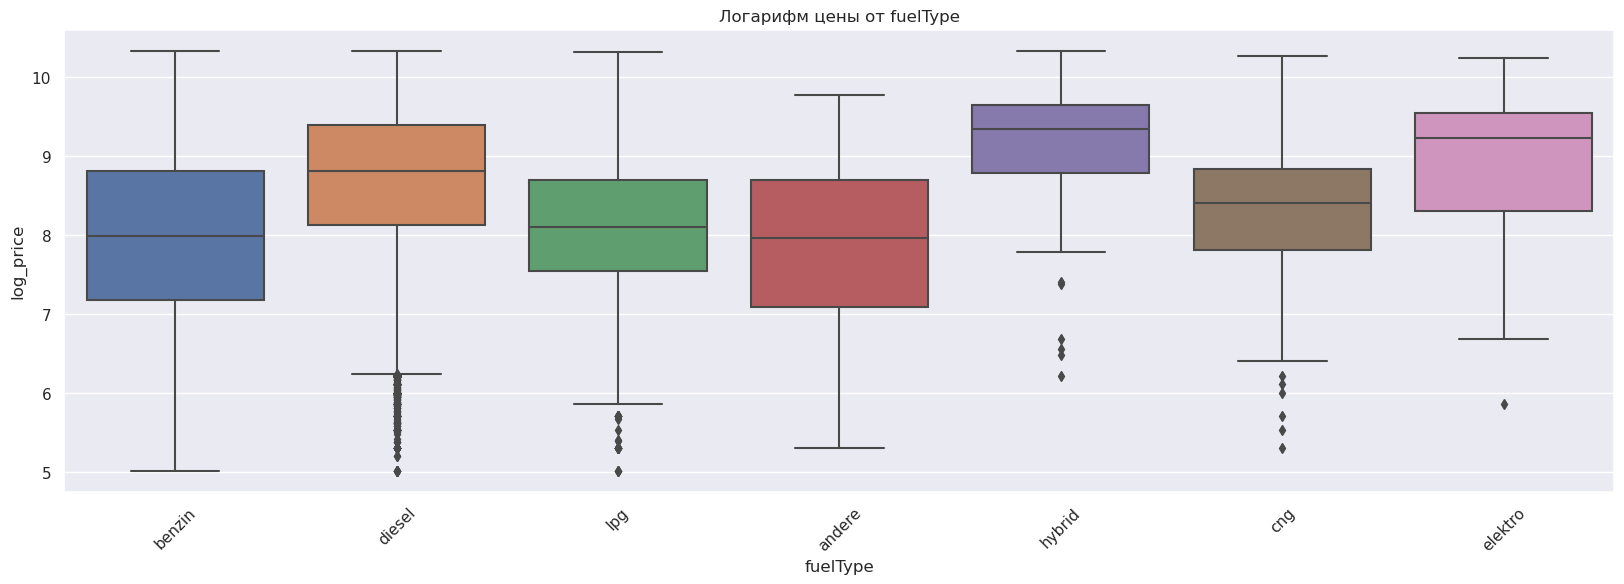

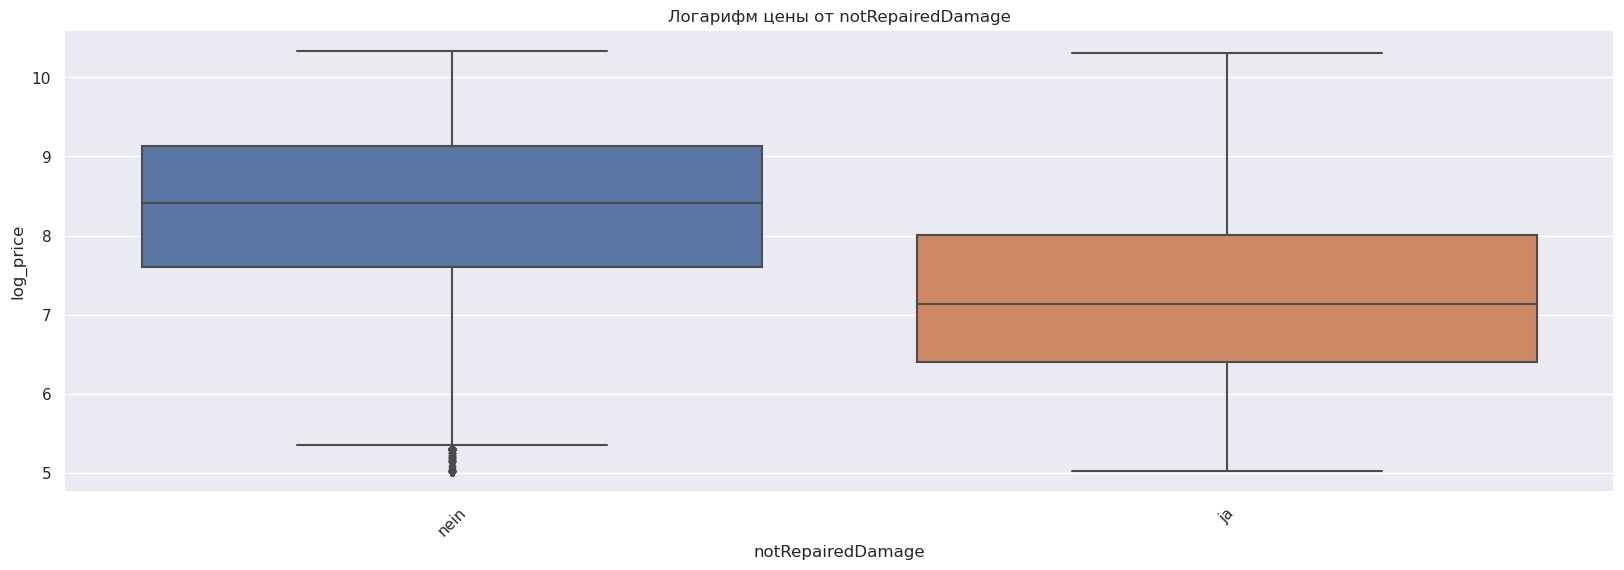

In [22]:
# категориальные признаки
for cat in categorical:
    # Очень много уникальных моделей
    if cat in ('model'):
        continue
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=cat, y='log_price', data=df)
    plt.title(f'Логарифм цены от {cat}')
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Все признаки оказывают серьезное влияние на целевую переменную. model имеет слишком много уникальных представлений, 
# поэтому на графиках нет ее. Тем более модель нужно рассматривать в совокупности с маркой, дабы исключить случайных совпаданий по названию,
# а это бы еще сильнее увеличило размер

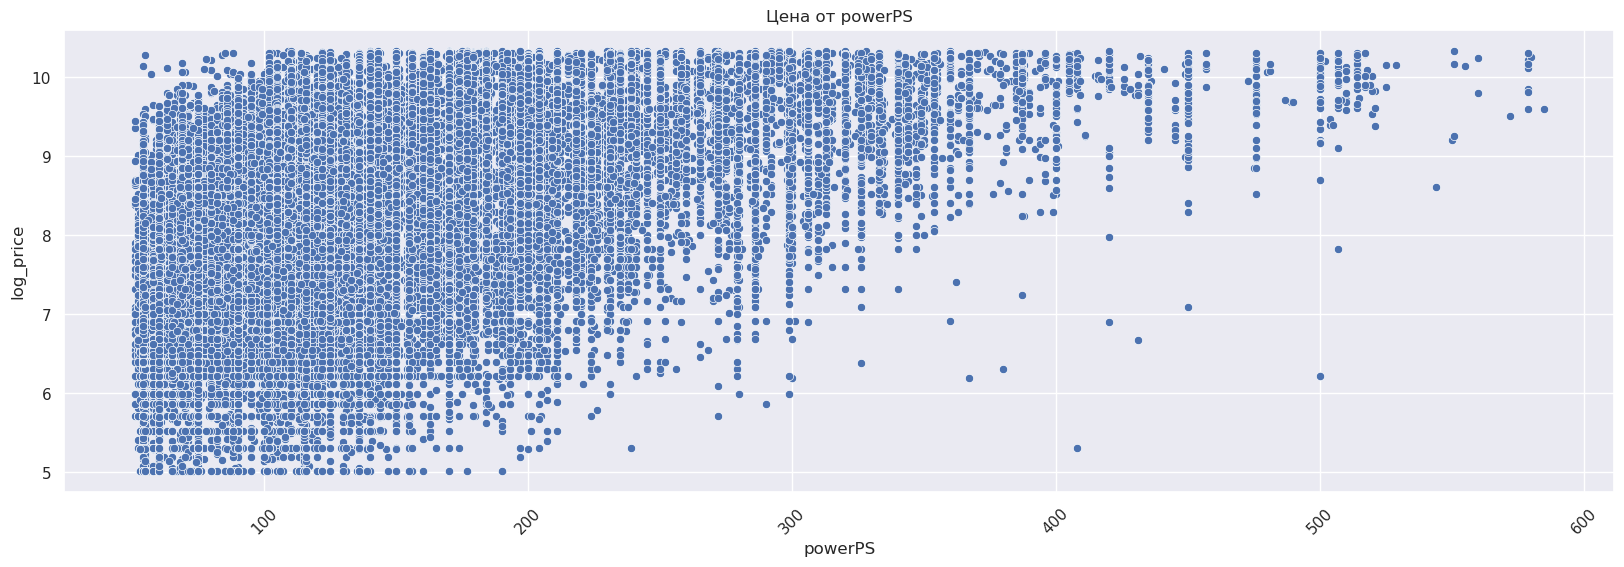

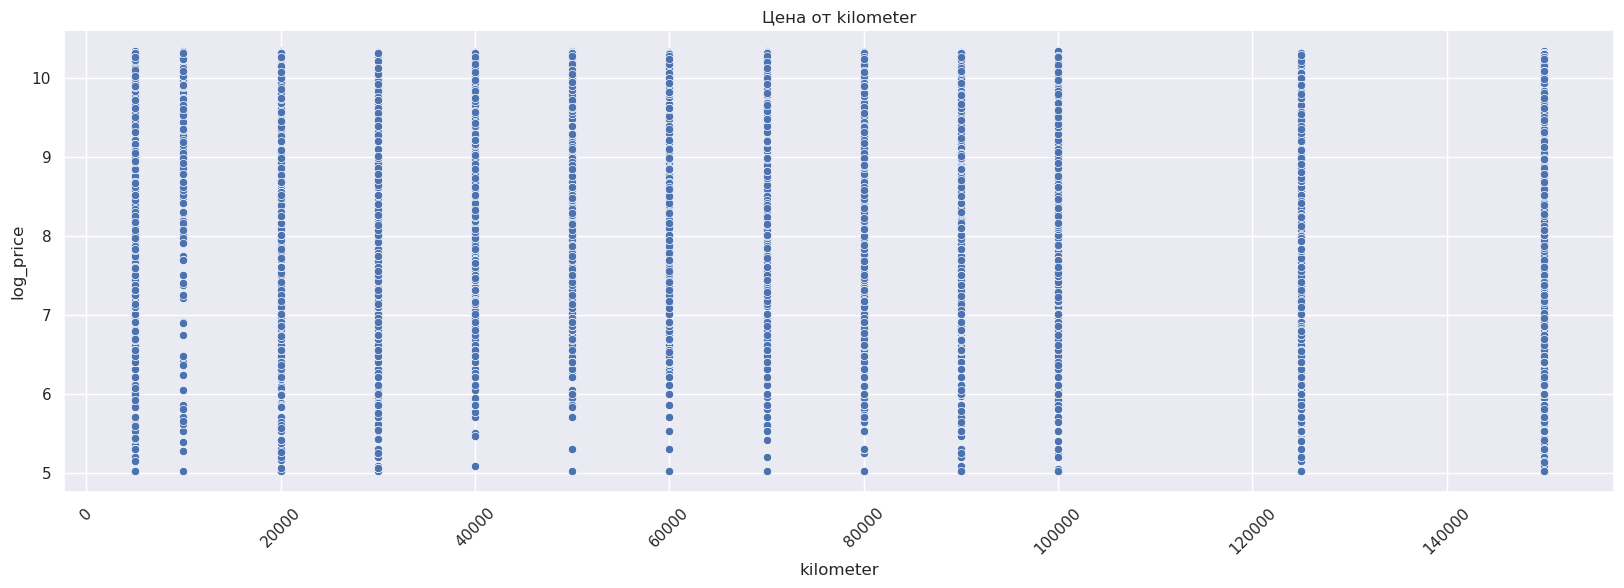

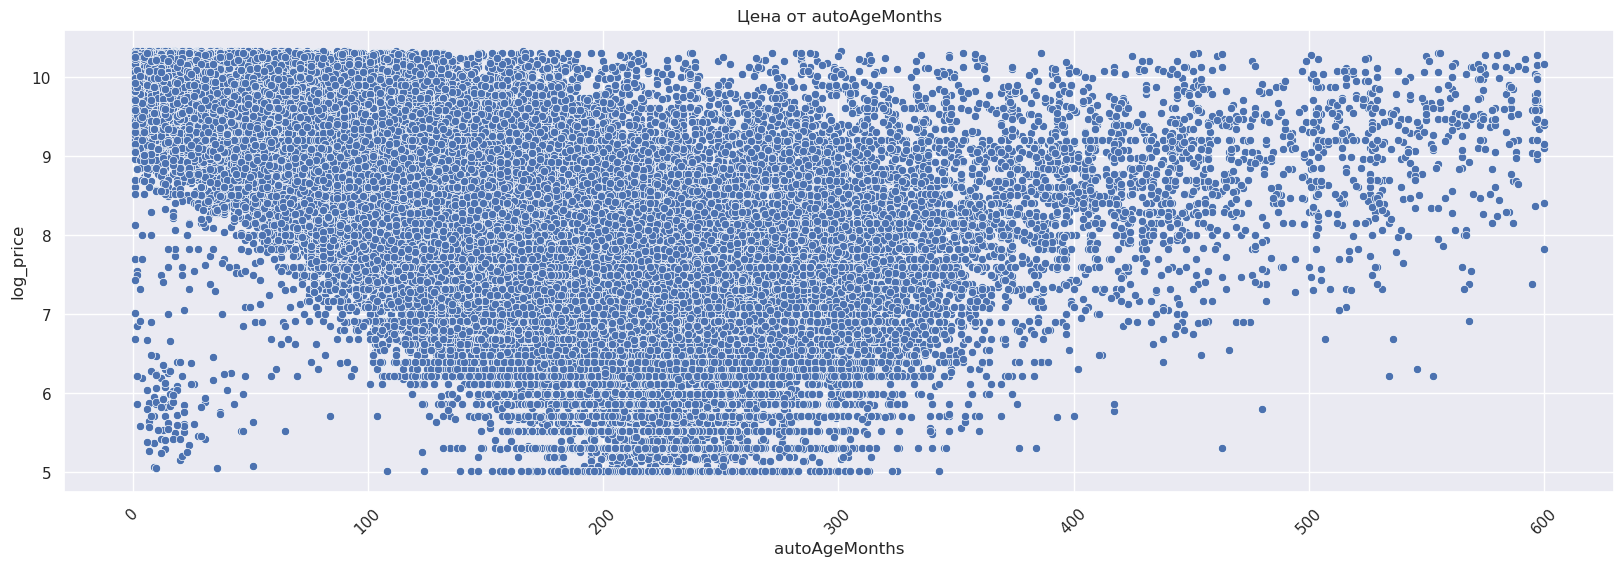

In [24]:
# категориальные признаки
for cat in numeric:
    if cat in ('price'):
        continue
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=cat, y='log_price', data=df)
    plt.title(f'Цена от {cat}')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
# df[(df['log_price'] < 7) & (df['autoAgeMonths'] < 50)]

In [ ]:
# При высокой мощности - цена растет, машина стареет - цена падает (Если смотреть без логарифма, то зависимость с возрастом еще более отчетливая),
# А пробег вполне можно рассматривать как категориальный признак (но необязательно)
# При этом шаг по пробегу неравномерный

# Данные и распределения выглядят логически закономерными
# Выбросами можно назвать разве что дешевые машины с минимальным возрастом
# Можем обрезать эти 111 значений. Данные там действительно подозрительные
df = df[(df['log_price'] > 7) | (df['autoAgeMonths'] > 50)] 

# Если вернуться к прошлому пункту и удалить те 15к "выбросов", с большими ценами, то общая картинка становится
# более равномерно распределенной, и нет явных выбросов по ценам. Но при этом кажется более "скучной",
# есть ощущение, что потеряем в предсказании для редких и дорогих случаев. Такие ситуации и решения нужно принимать исходя из ТЗ 
# и, основываясь на результатах модели

### **Предобработка данных**

In [27]:
# Делать OHE к бренду и модели - это сильно увеличит размер выборки. Поэтому я бы сделал
# label или target encoding, к остальным OHE. Но label и target даст большие значения внутри ячеек, для 
# модели без регулярицаии это может быть фатально

# К числовым признакам можно применить нормализацию (Пробег можно было бы закодировать вместе с 
# категориальными, но шаг не равномерный, а в таком случае лучше оставить его числовым признаком)

In [28]:
# Переосмысление
categorical = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'brand', 'model']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = [] 

In [29]:
# удалим лишнюю колонку
df['price'] = df['log_price']
df = df.drop('log_price', axis=1)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

In [31]:
df['bias'] = 1
other += ['bias']

x = df[categorical + numeric + other]
y = df['price']

# label_encoder = LabelEncoder()

# for col in categorical_label:
#     x[col] = label_encoder.fit_transform(x[col])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

### **Разделение данных на выборки**

In [32]:
x = x.toarray()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y.values, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [55]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
def ret_config(l, method, dim):
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dim, 
            'lambda_': l
        }
    }
    return descent_config

In [36]:
x_train.shape[1]

309

In [ ]:
l_list = np.logspace(-4, 1, 6)
methods_list = ['full', 'stochastic', 'momentum', 'adam']

res = {}

for method in tqdm(methods_list):
    res[method] = {
        'lambda': [],
        'mse_train': [], 'mse_val': [], 'mse_test': [],
        'r2_train': [], 'r2_val': [], 'r2_test': [],
        'max_iter': [], 
        'loss_history': []
    }
    
    for l in l_list:
        model = LinearRegression(descent_config=ret_config(l, method, x_train.shape[1]), 
                                    tolerance=0.0001, max_iter=3000)


        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        y_test_pred = model.predict(x_test)
        
        if np.any(np.isnan(y_train_pred)) or np.any(np.isnan(y_val_pred)) or np.any(np.isnan(y_test_pred)):
            # на выходе получились Nan, рассчитать метрики нельзя и не имеет смысла
            mse_train = None
            mse_val = None
            mse_test = None
            r2_train = None
            r2_val = None
            r2_test = None
        else:
            mse_train = mean_squared_error(y_train, y_train_pred)
            mse_val = mean_squared_error(y_val, y_val_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)
            
            r2_train = r2_score(y_train, y_train_pred)
            r2_val = r2_score(y_val, y_val_pred)
            r2_test = r2_score(y_test, y_test_pred)

        res[method]['lambda'].append(l)
        res[method]['mse_train'].append(mse_train)
        res[method]['mse_val'].append(mse_val)
        res[method]['mse_test'].append(mse_test)
        res[method]['r2_train'].append(r2_train)
        res[method]['r2_val'].append(r2_val)
        res[method]['r2_test'].append(r2_test)
        res[method]['max_iter'].append(model.iterations)
        res[method]['loss_history'].append(model.loss_history)


In [ ]:
# В пункте 2 задания сказано: "Зафиксируйте количество итераций, необходимое для достижения сходимости". Но сама 
# по себе сходимость не говорит о том, что наша модель получилась хорошей или плохой. Она свидетельствует лишь о 
# том, что веса перестали сильно изменяться. Они могут слабо изменяться по двум причинам: 1. скорость обучения очень маленькая;
# 2. ошибка стала маленькой. В контексте нашей реальности сошлись модели с изначально маленьким lambda.
# Для сходимости при большом начальном lambda пришлось бы очень долго ждать (или пока lr за счет итераций уменьшилось бы) 
# или уменьшился бы градиент. 3000 итераций - это и так довольно много. Учитывая, что для 3000 итераций сошлись только
# модели с изначально маленьким lambda, то и графики такие не имеют смысла. Логичнее построить графики зависимости loss от
# номера итерации. И графики ошибки на валидационном наборе в зависимости от lambda. Момент, когда loss перестает существенно меняться тоже может
# свидетельствовать о том, что модель достигла минимума

# Упс, оказывается об этом пункт 5.2. Надеюсь, что можно обойтись все таки без запуска подсчета на сутки с огромным количеством итераций. 
# Выводы можно сделать и так. Веса перестают сильно изменяться при достижении локального минимума функции или при очень маленькой скорости обучения.
# с первым условием надежнее справятся продвинутые методы, такие как адам и моментум (потому что они обеспечивают более стабильную сходимость).
# На второе условие влияет количество итераций, ведь в нашей задаче lr обратно пропорционально их количеству

In [ ]:
# Построим графики ошибки в зависимости от lambda.
# Для test тоже сразу постою, чтоб потом не пересчитывать, если понадобится

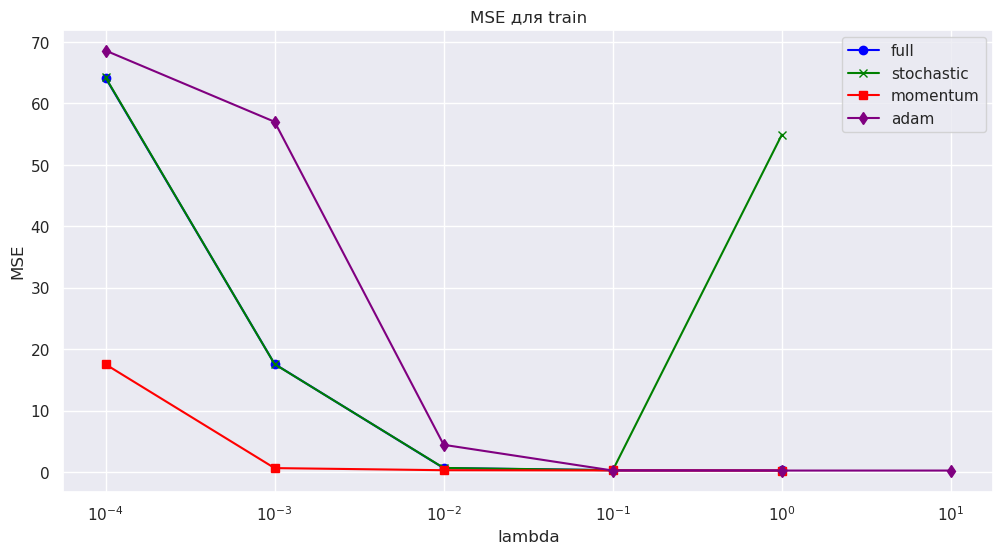

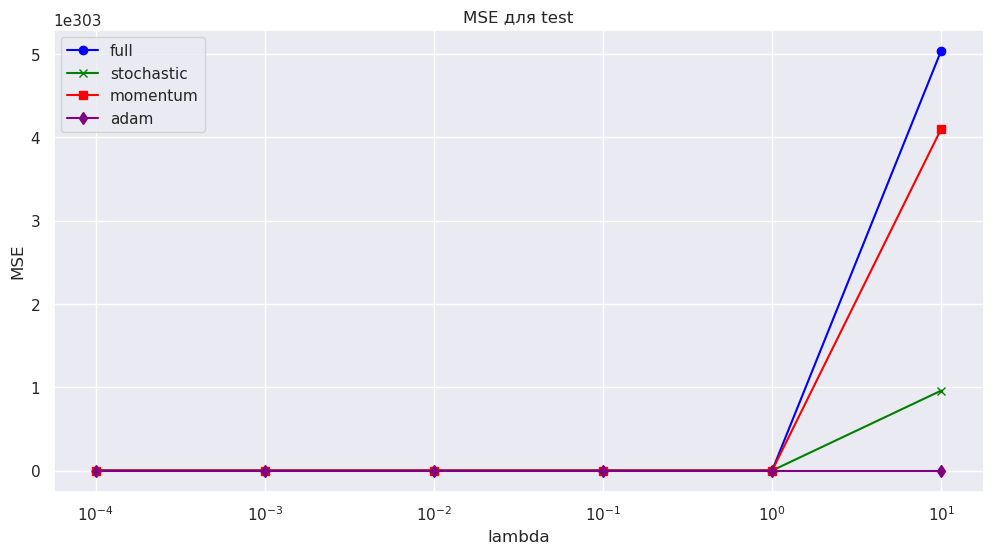

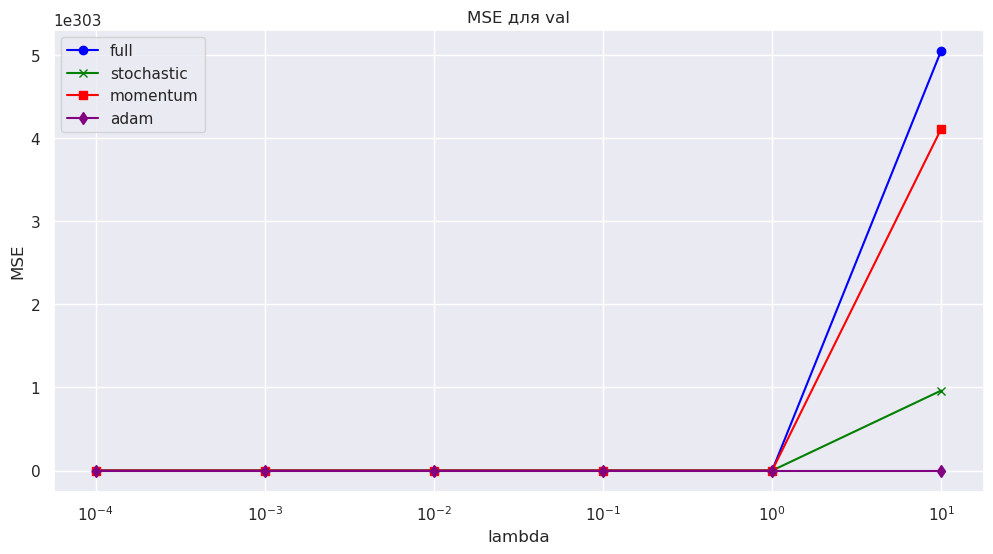

In [58]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list, res[method][f'mse_{mode}'], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'MSE для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [84]:
# Обрежем первые 5 значений. Иначе плохо понятно, что происходит на маленьких ошибках

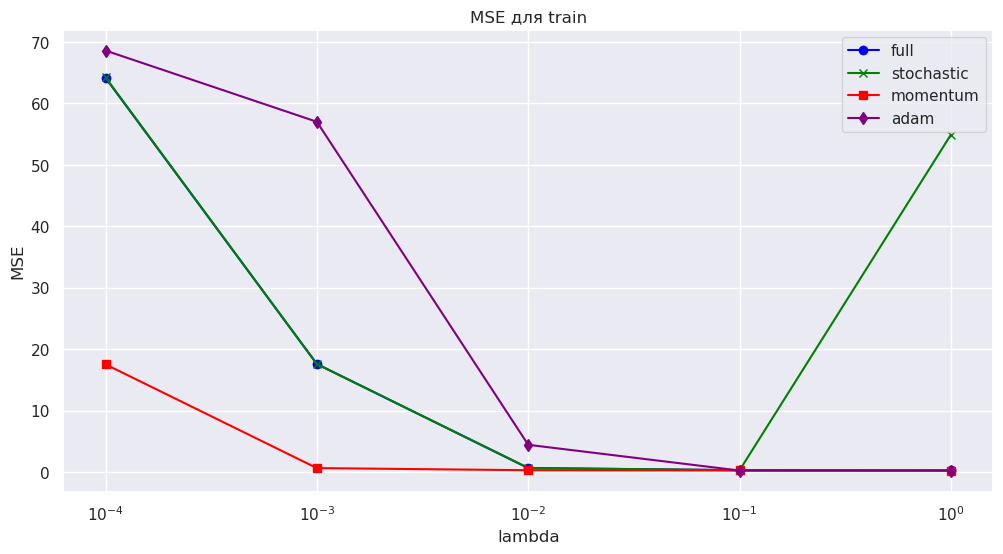

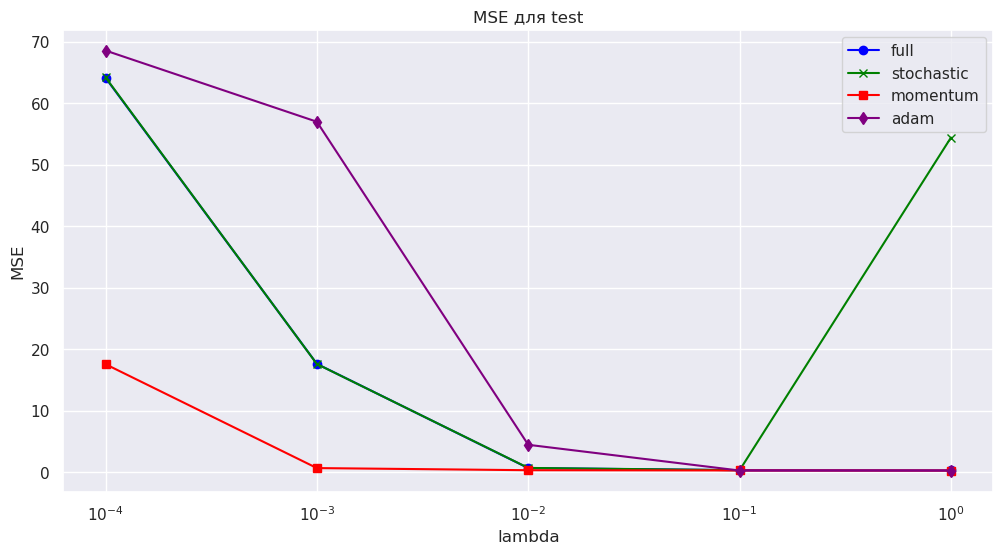

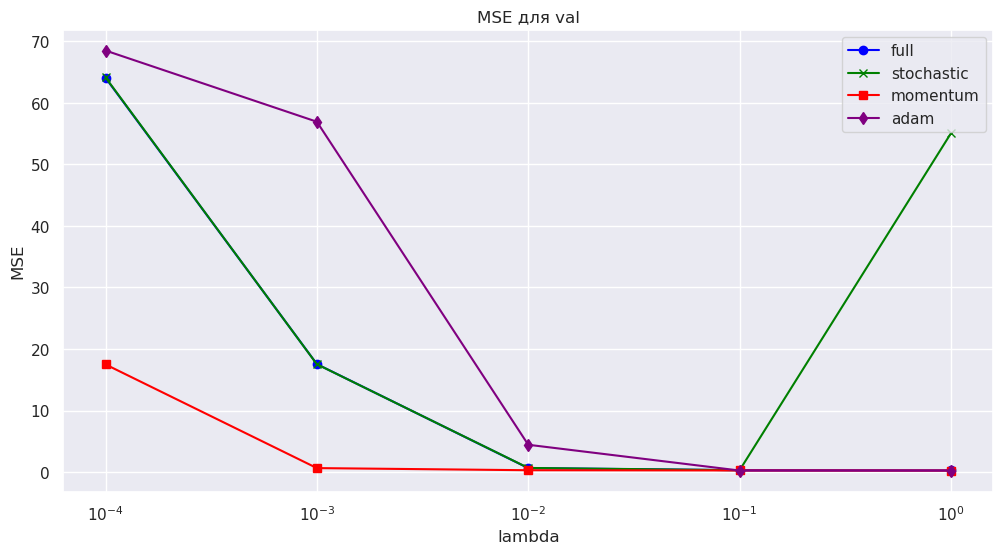

In [61]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list[:5], res[method][f'mse_{mode}'][:5], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'MSE для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [ ]:
# Для больших lambda характерно очень сильное переобучение модели. Для маленьких lambda явно не хватает количества итераций для достижений минимума.
# И/или возможно ситуация, при которой мы попадаем в локальный минимум и не можем из него выбраться.
# Основываясь на значениях mse для train и val, делаем вывод, что оптимальная lambda = 0.01-0.1

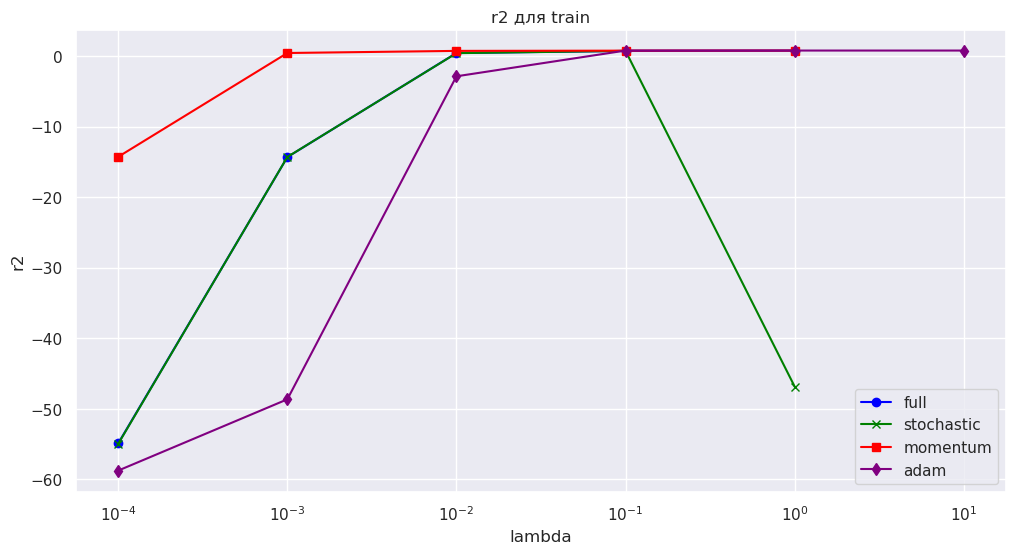

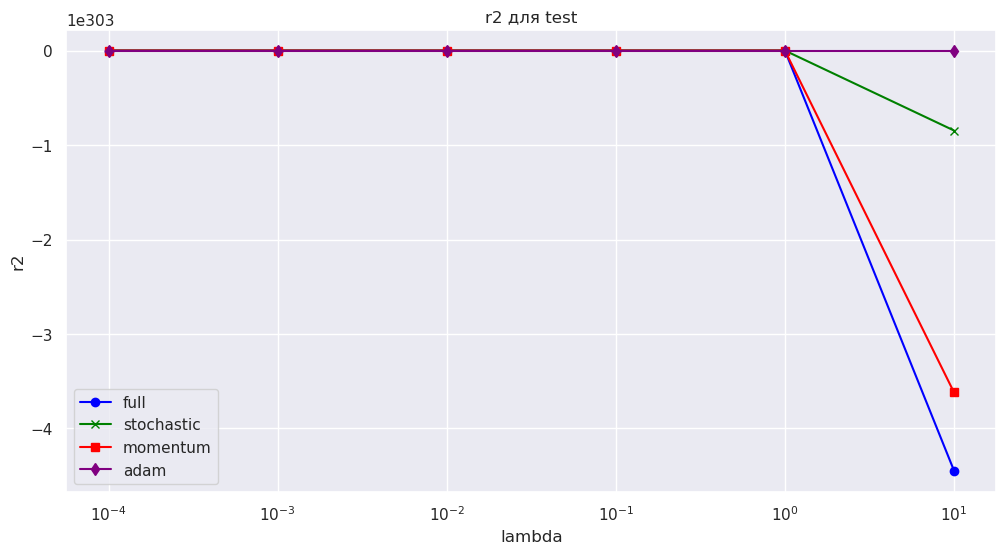

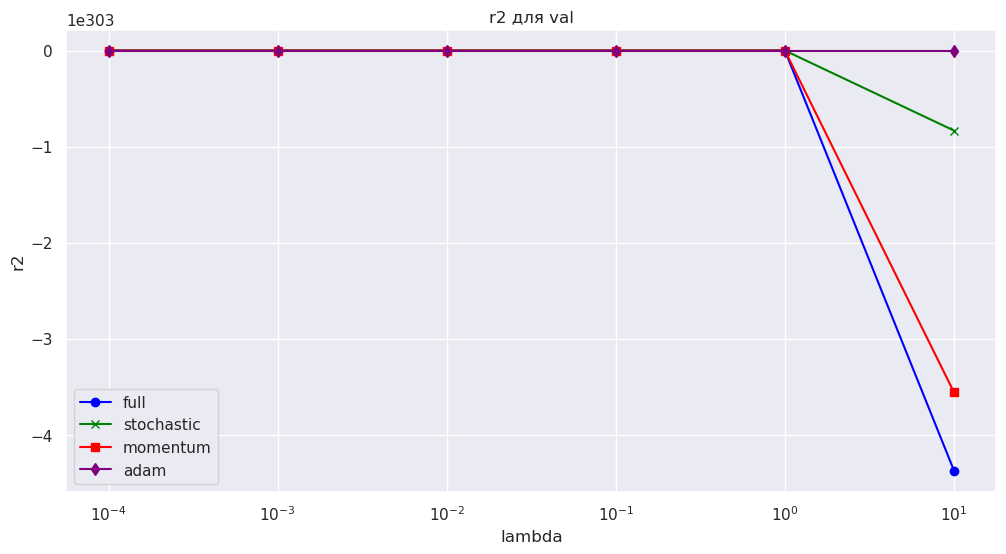

In [62]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list, res[method][f'r2_{mode}'], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'r2 для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('r2')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [ ]:
# Обрежем первые 5 значений. Иначе плохо понятно, что происходит на маленьких ошибках

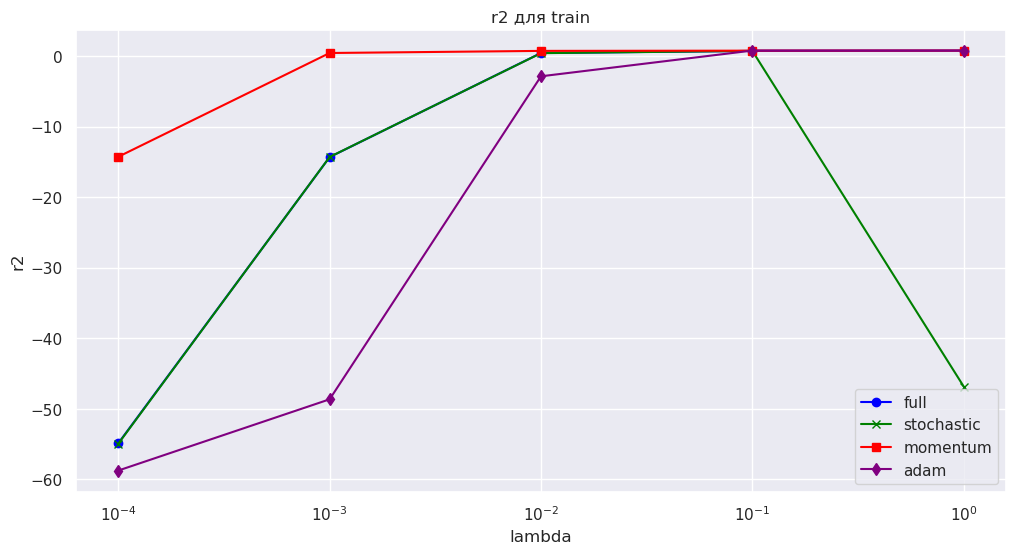

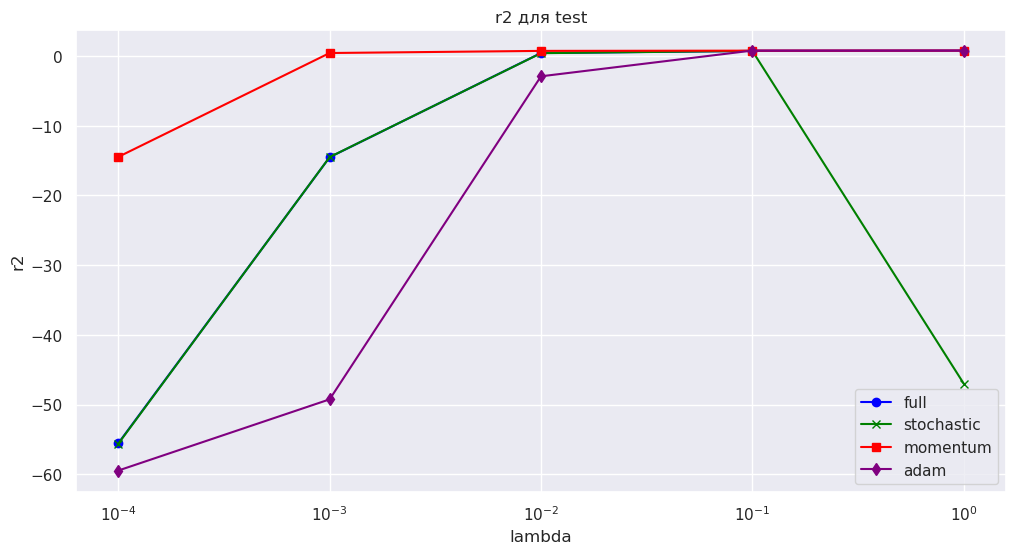

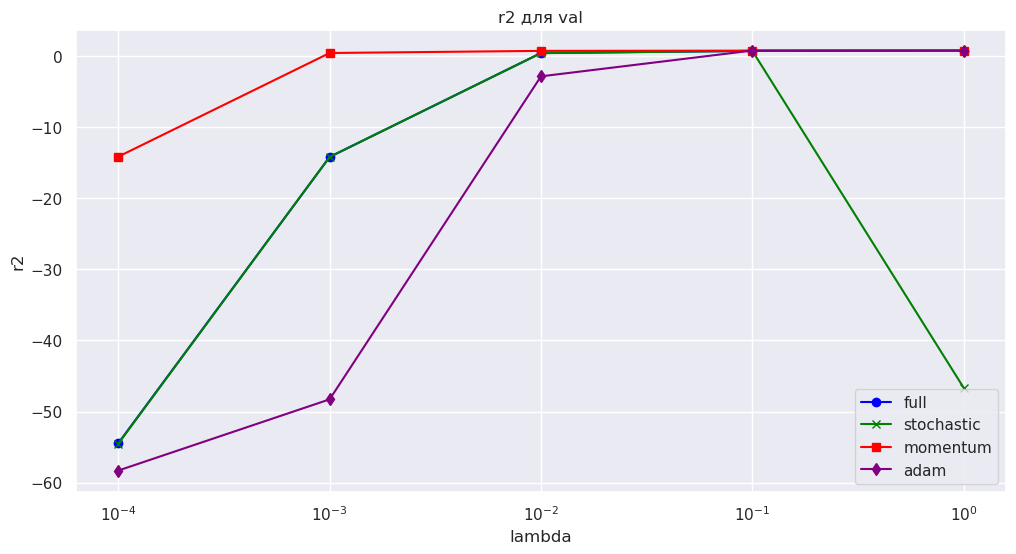

In [64]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list[:5], res[method][f'r2_{mode}'][:5], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'r2 для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('r2')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [ ]:
# Практически Для всех моделей лучше всего себя показал lambda в диапазоне 0.1-0.01.
# Выводы можно сделать аналогичные пункту с MSE. Большие lambda => риск переобучения, маленькие - недообучения.

In [ ]:
# Общие выводы:
# Adam сильно сглаживает обновления, поэтому может оказаться медленнее в плане скорости сходимости, чем 
# full и stochastic. Зато показывает лучший результат на "длинной" дистанции. 
# stochastic и full обучаются примерно с одинаковой скоростью, но при этом stochastic вычислительно легче и меньше подвержен выбросам
# momentum показал самую стабильную скорость работы среди всех вышеперечисленных методов. 

In [ ]:
# Основываясь на результатах выше, по скорости-качеству оптимиальным методом был выбран momentum c lambda = 0.1
# Самая быстрая и качественная сходимость

In [ ]:
# Лучшие значения l
{'full': 1.0,
 'stochastic': 0.1, 
 'momentum': 1.0, 
 'adam': 0.1}

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [58]:
from IPython.display import display

In [ ]:
for method in methods_list:
    print(method)
    df_temp = pd.DataFrame(res[method])[['lambda', 'mse_train', 'mse_val', 'mse_test', 'r2_train', 'r2_val','r2_test', 'max_iter']]
    # Большие числа заменяем на бесконечности для красоты
    df_temp[df_temp > 10**100] = np.inf
    df_temp[df_temp < -10**100] = -np.inf
    df_temp['mse_train'] = round(df_temp['mse_train'], 3)
    df_temp['mse_val'] = round(df_temp['mse_val'], 3)
    df_temp['mse_test'] = round(df_temp['mse_test'], 3)
    df_temp['r2_train'] = round(df_temp['r2_train'], 3)
    df_temp['r2_val'] = round(df_temp['r2_val'], 3)
    df_temp['r2_test'] = round(df_temp['r2_test'], 3)
    display(df_temp)

full


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     64.155   64.083    64.113   -54.908 -54.473  -55.558       838
1   0.0010     17.573   17.540    17.582   -14.314 -14.183  -14.510      3000
2   0.0100      0.642    0.646     0.646     0.441   0.440    0.430      2663
3   0.1000      0.298    0.301     0.300     0.740   0.740    0.735      3000
4   1.0000      0.260    0.264     0.261     0.773   0.772    0.770      3000
5  10.0000        inf      inf       inf      -inf    -inf     -inf       178

stochastic


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     64.272   64.200    64.230   -55.010 -54.574  -55.661       796
1   0.0010     17.555   17.521    17.564   -14.298 -14.167  -14.495      3000
2   0.0100      0.686    0.691     0.690     0.402   0.402    0.391      2141
3   0.1000      0.298    0.300     0.300     0.740   0.740    0.736      3000
4   1.0000     41.215   39.979    40.497   -34.916 -33.608  -34.725      3000
5  10.0000        inf      inf       inf      -inf    -inf     -inf       178

momentum


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     17.527   17.493    17.535   -14.273 -14.143  -14.469      3000
1   0.0010      0.642    0.646     0.646     0.441   0.441    0.430      2648
2   0.0100      0.298    0.301     0.300     0.740   0.740    0.735      3000
3   0.1000      0.260    0.264     0.261     0.773   0.772    0.770      3000
4   1.0000      0.246    0.250     0.248     0.785   0.783    0.781      3000
5  10.0000        inf      inf       inf      -inf    -inf     -inf       215

adam


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     68.568   68.494    68.520   -58.753 -58.292  -59.447       308
1   0.0010     57.004   56.951    56.973   -48.676 -48.300  -49.260      3000
2   0.0100      4.433    4.439     4.433    -2.863  -2.843   -2.911      3000
3   0.1000      0.244    0.249     0.246     0.787   0.784    0.783      3000
4   1.0000      0.243    0.248     0.244     0.788   0.786    0.784      3000
5  10.0000      0.243    0.248     0.244     0.788   0.786    0.784      3000

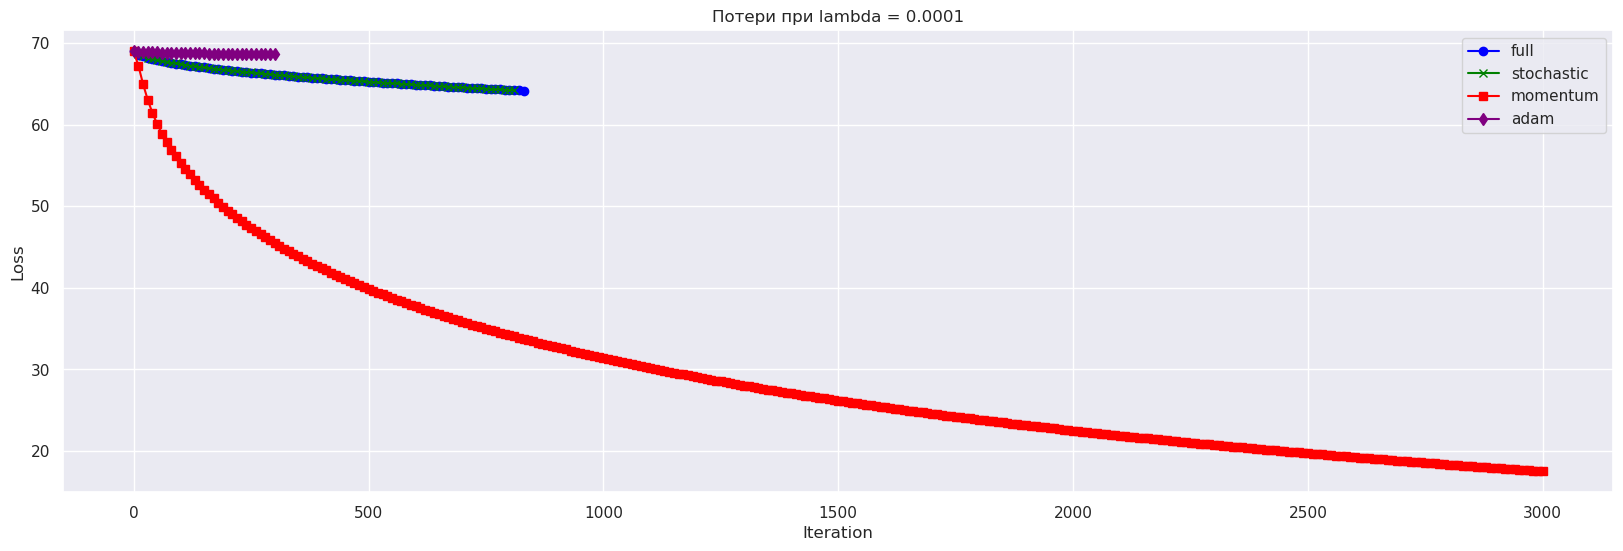

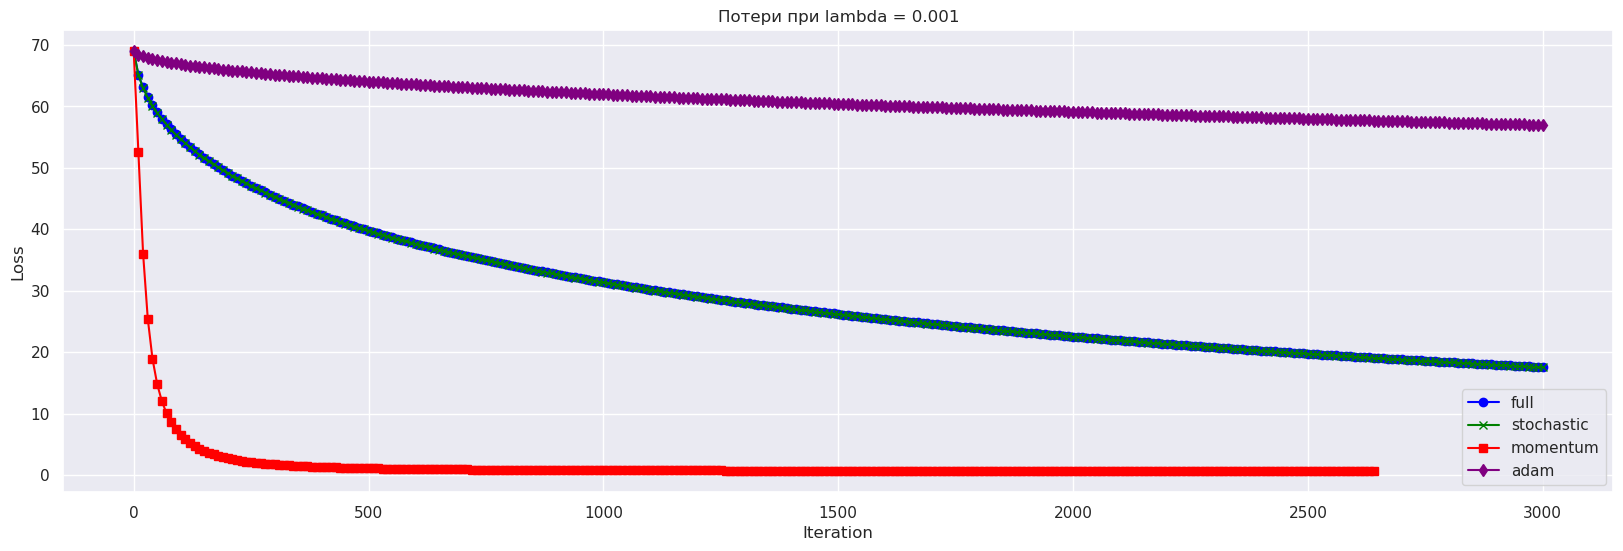

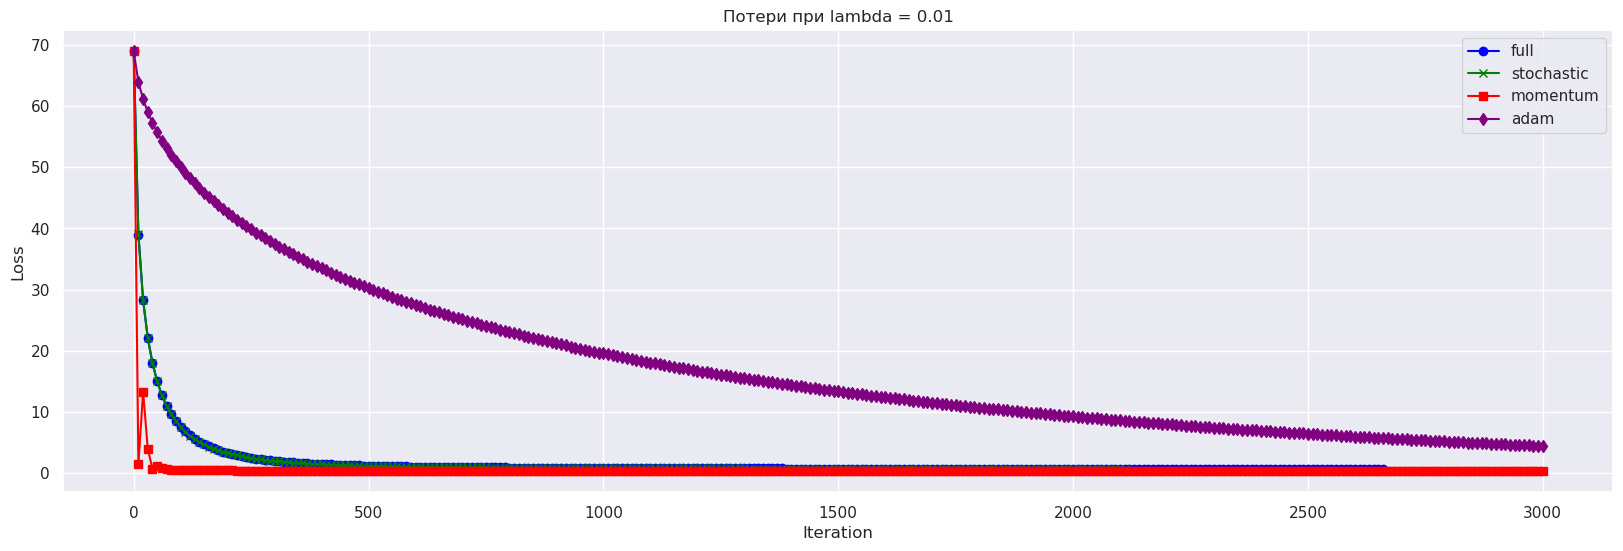

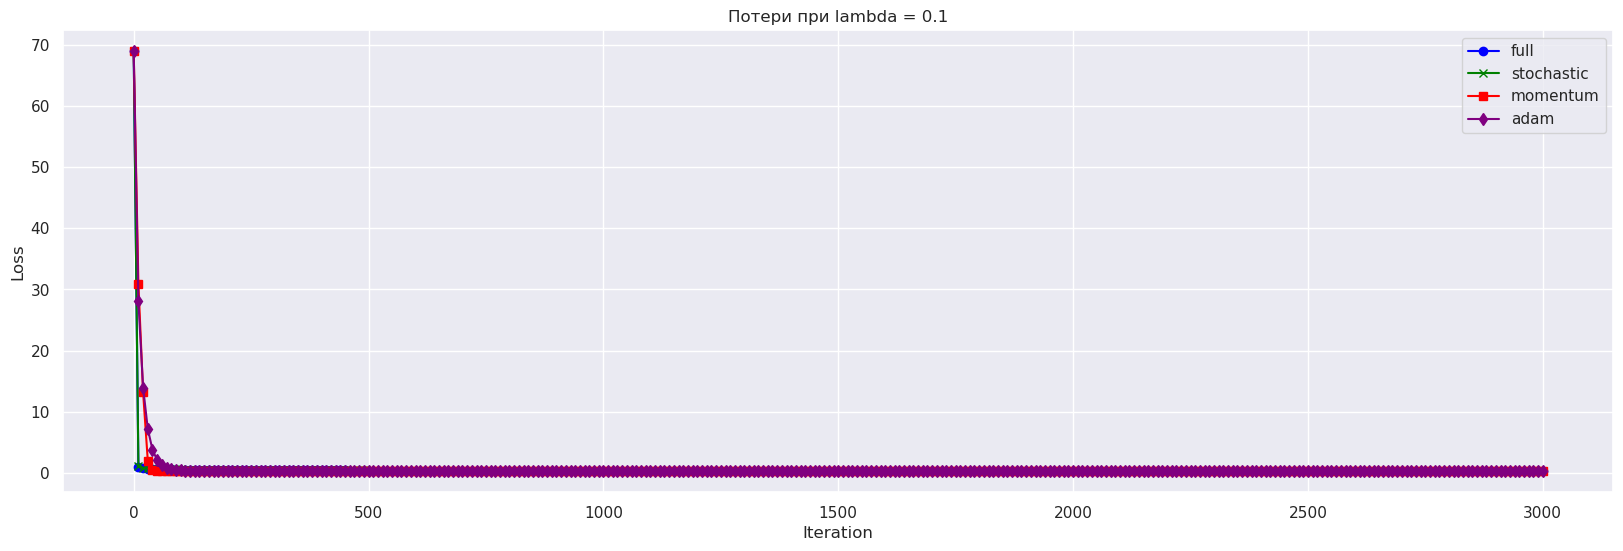

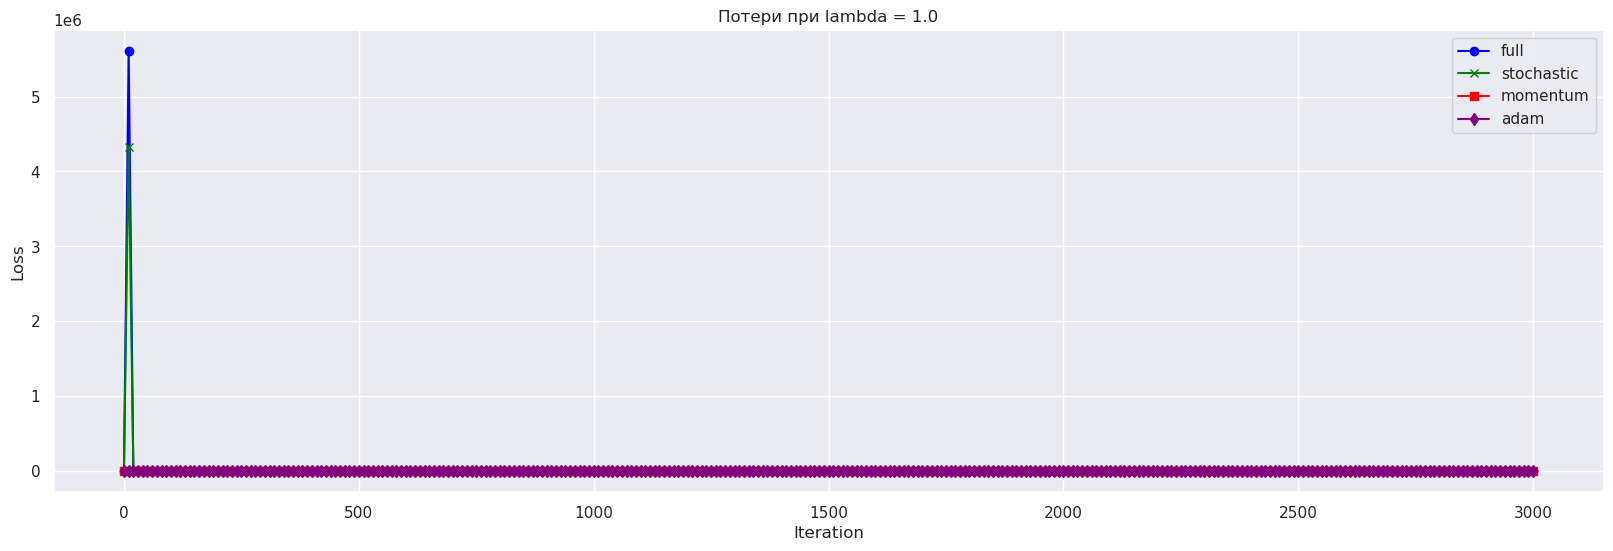

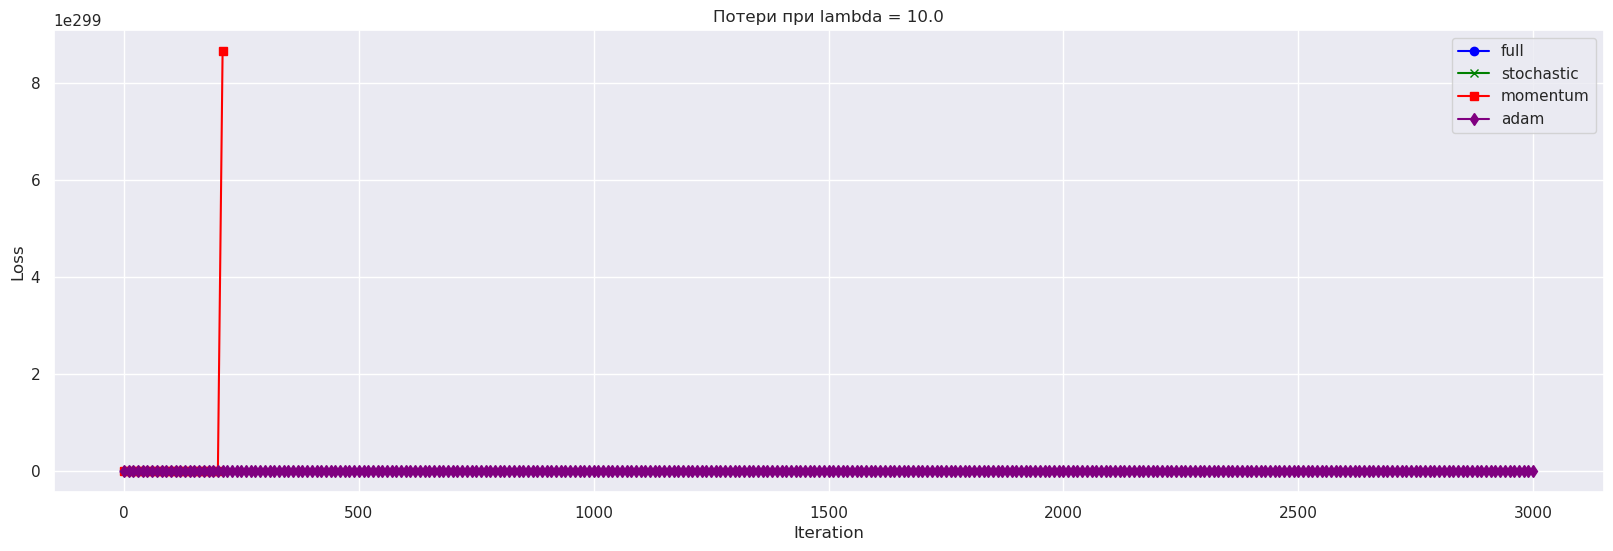

In [202]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
num_iter = 3001

n = 10 # Каждая n-ая точка для нормальной картинки
for j, l in enumerate(l_list):
    plt.figure(figsize=(20, 6))
    for i, method in enumerate(methods_list):
        loss_hist = res[method]['loss_history'][j]
        if len(loss_hist) < num_iter:
            loss_hist = loss_hist + [np.nan] * (num_iter - len(loss_hist))
        
        iterations = range(num_iter)[::n]
        loss_hist = loss_hist[::n]
        plt.plot(iterations, loss_hist, label=f'{methods_list[i]}', color=colors[i], marker=markers[i])

    plt.title(f'Потери при lambda = {l}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

При больших l=10 все кроме адама якобы сошлись, на самом  деле это связано с тем, что веса модели переполнились и мы уже вне рамках возможных типов питона.

1) Быстрее всего сходится momentum, за ним следуют full и stochastic, adam последний;
2) Величина ошибки на обучающей и тестовой выборках находятся в одинаковых диапазонах значений. Другое дело, что
при маленьких значениях lambda ни одна модель не показала достаточно хорошего результата ни по одной метрике (не хватило итераций);


full и sgd требуют более тщательного подбора гиперпараметров, чем моментум и адам. При слишком маленьких и слишком больших lambda есть большой риск недообучения и переобучения. Точность по метрикам MSE и R2 получается хуже, чем у моментума и адама
Зато требуют меньше вычислительных ресурсов, что является плюсом. При этом full требует чуть больше времени для достижении сходимости, чем sgd, так как его спуск является более плавным

momentum обладает более быстрой сходимостью за счет дополнительных настроек обновления весов (учитываем импульс), но имеет итоговую точность чуть хуже адама.

Адам является самой стабильной и точной моделью. При хорошем lambda скорсть сходимости не уступает моментуму. Но в остальных случаях может потребоваться больше времени для достижения заданной точности


Оптимальным методом для нашей задачи является моментум, он быстрее сходится и требует меньше вычислительных ресурсов, чем адам. Но больше чем SGD. При этом итогое качество получается чуть слабее адама и заметно лучше SGD

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [42]:
import time

In [43]:
def ret_config(l, method, dim, batch_size):
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dim, 
            'lambda_': l,
            'batch_size': batch_size
        }
    }
    return descent_config

In [44]:
# увелчил tolerance для ускорения процесса
batch_sizes = np.arange(5, 500, 10)

l = 0.01

iter_list = []
time_list = []

for batch_size in batch_sizes:
    temp_iter = []
    temp_time = []
    for _ in range(10):
        start_time = time.time()
        model = LinearRegression(descent_config=ret_config(l, 'stochastic', x_train.shape[1], batch_size), 
                                    tolerance=0.001, max_iter=10000)
        model.fit(x_train, y_train)

        end_time = time.time()
        execution_time = end_time - start_time

        temp_iter.append(model.iterations)
        temp_time.append(execution_time)
    iter_list.append(np.mean(temp_iter))
    time_list.append(np.mean(temp_time))

Достигли сходимости на итерации 318
Достигли сходимости на итерации 322
Достигли сходимости на итерации 285
Достигли сходимости на итерации 320
Достигли сходимости на итерации 318
Достигли сходимости на итерации 288
Достигли сходимости на итерации 276
Достигли сходимости на итерации 302
Достигли сходимости на итерации 318
Достигли сходимости на итерации 315
Достигли сходимости на итерации 305
Достигли сходимости на итерации 395
Достигли сходимости на итерации 304
Достигли сходимости на итерации 350
Достигли сходимости на итерации 352
Достигли сходимости на итерации 344
Достигли сходимости на итерации 400
Достигли сходимости на итерации 337
Достигли сходимости на итерации 356
Достигли сходимости на итерации 385
Достигли сходимости на итерации 399
Достигли сходимости на итерации 360
Достигли сходимости на итерации 366
Достигли сходимости на итерации 383
Достигли сходимости на итерации 388
Достигли сходимости на итерации 370
Достигли сходимости на итерации 348
Достигли сходимости на итера

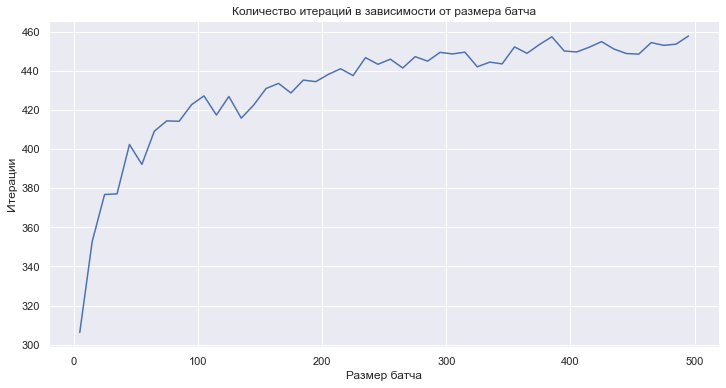

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, iter_list)
plt.title('Количество итераций в зависимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Итерации')
plt.grid(True)
plt.show()

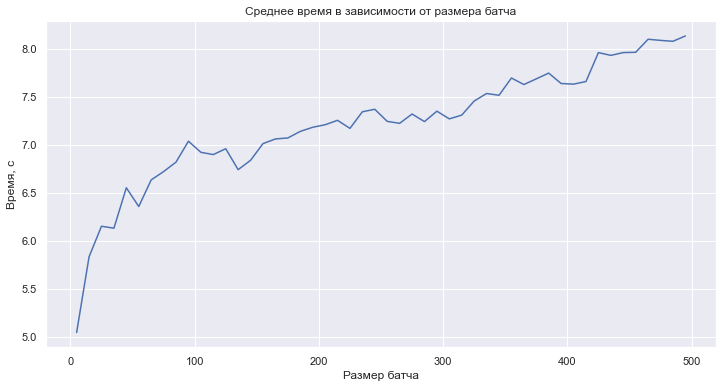

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, time_list)
plt.title('Среднее время в зависимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время, с')
plt.grid(True)
plt.show()

Для маленького батча характерно более шумное обновление весов. Такое поведение может привести к нестабильному результату.
Зато явно меньше затрат на память и более быстрая сходимость, но как мы убедились в прошлом пункте - сходимость по весам не означает сходимость по ошибке.
Большой батч делает более стабильные и осмысленные обновления весов. Это приводит в конечном счете к стабильному результату,
но затрачивает гораздо больше памяти и времени за счет того, что приходится считать градиент по всей выборке. В более 
сложных задачах при большом батче есть шанс застрять в локальных минимумах функции распределения, поэтому может иметь смысл использовать большую скорость обучения.
Средний батч оказывается оптимален. Он обеспечивает достаточно быструю и стабильную сходимость, затрачивая приемлемое количество ресурсов. 
Для нашей задачи это примерно 64 элемента. Думаю, что размер батча можно подобрать методом локтя

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [46]:
def ret_config(l, method, dim, mu):
    descent_config = {
        'descent_name': method,
        'regularized': True, 
        'kwargs': {
            'dimension': dim, 
            'lambda_': l, 
            'mu': mu
        }
    }
    return descent_config

In [ ]:
l_list = np.logspace(-3, 1, 5) # Убрал 10^-4 - с ним очевидно модель не сойдется
mu_list = np.logspace(-4, 1, 6)
methods_list = ['full', 'stochastic', 'momentum', 'adam']

res_reg = {}

for method in tqdm(methods_list):
    res_reg[method] = {
        'lambda_reg': [],
        'mse_train': [], 'mse_val': [], 'mse_test': [],
        'r2_train': [], 'r2_val': [], 'r2_test': [],
        'max_iter': [], 
        'loss_history': []
    }
    
    for l in l_list:
        for mu in mu_list:
            model = LinearRegression(descent_config=ret_config(l, method, x_train.shape[1], mu), 
                                        tolerance=0.0001, max_iter=3000)

            model.fit(x_train, y_train)

            y_train_pred = model.predict(x_train)
            y_val_pred = model.predict(x_val)
            y_test_pred = model.predict(x_test)
            
            if np.any(np.isnan(y_train_pred)) or np.any(np.isnan(y_val_pred)) or np.any(np.isnan(y_test_pred)):
                # на выходе получились Nan, рассчитать метрики нельзя и не имеет смысла
                mse_train = None
                mse_val = None
                mse_test = None
                r2_train = None
                r2_val = None
                r2_test = None
            else:
                mse_train = mean_squared_error(y_train, y_train_pred)
                mse_val = mean_squared_error(y_val, y_val_pred)
                mse_test = mean_squared_error(y_test, y_test_pred)
                
                r2_train = r2_score(y_train, y_train_pred)
                r2_val = r2_score(y_val, y_val_pred)
                r2_test = r2_score(y_test, y_test_pred)

            res_reg[method]['lambda_reg'].append((l, mu))
            res_reg[method]['mse_train'].append(mse_train)
            res_reg[method]['mse_val'].append(mse_val)
            res_reg[method]['mse_test'].append(mse_test)
            res_reg[method]['r2_train'].append(r2_train)
            res_reg[method]['r2_val'].append(r2_val)
            res_reg[method]['r2_test'].append(r2_test)
            res_reg[method]['max_iter'].append(model.iterations)
            res_reg[method]['loss_history'].append(model.loss_history)

In [191]:
# import json

# with open('results_cosh.json', 'w') as f:
#     json.dump(res_cosh, f, indent=4)

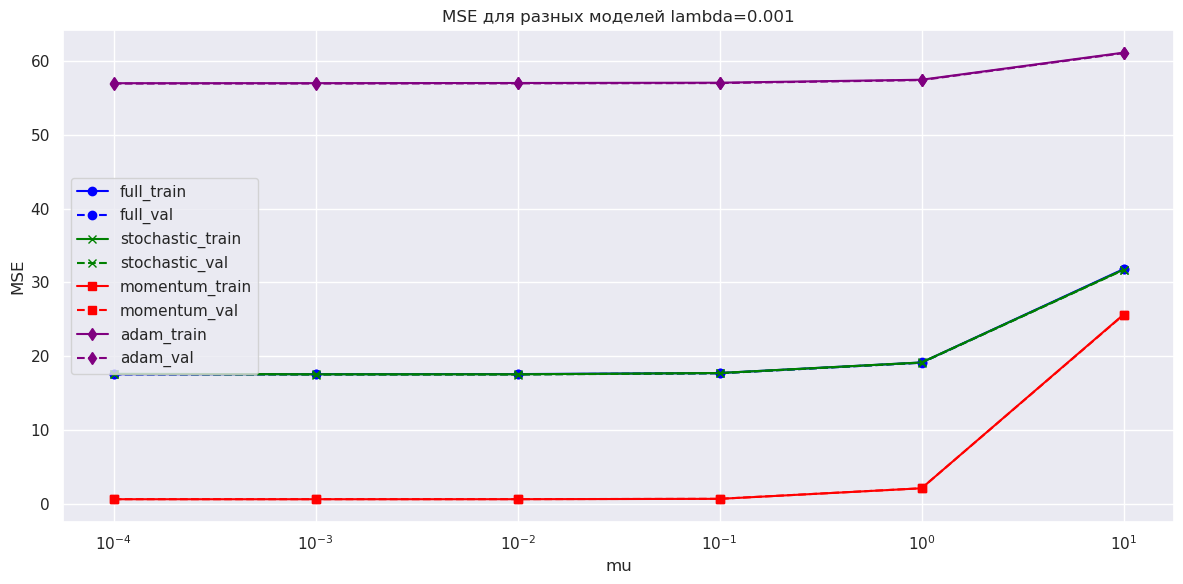

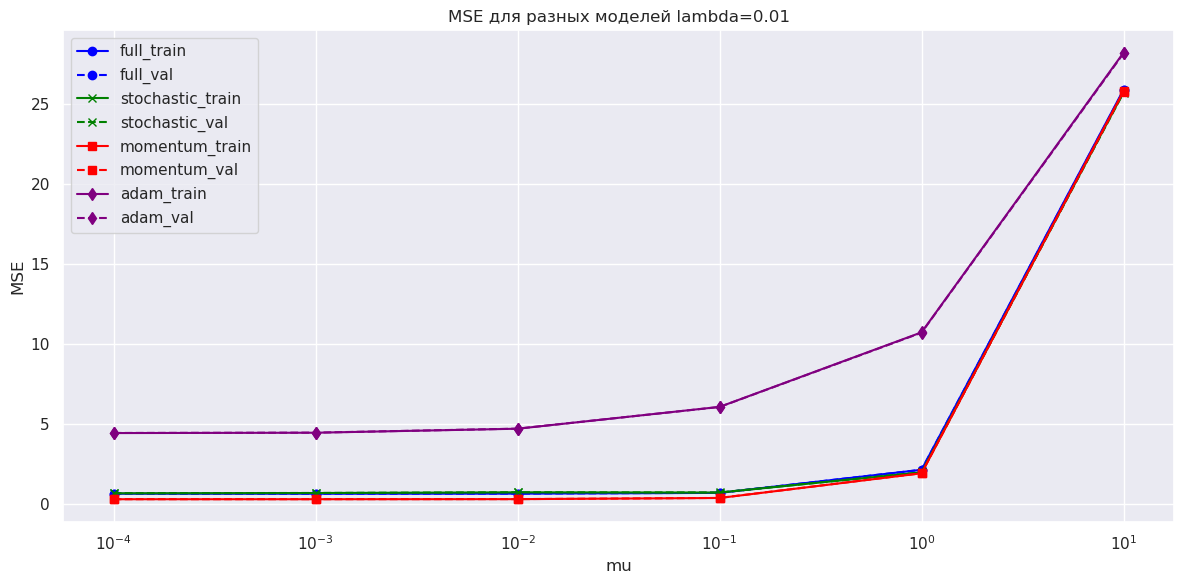

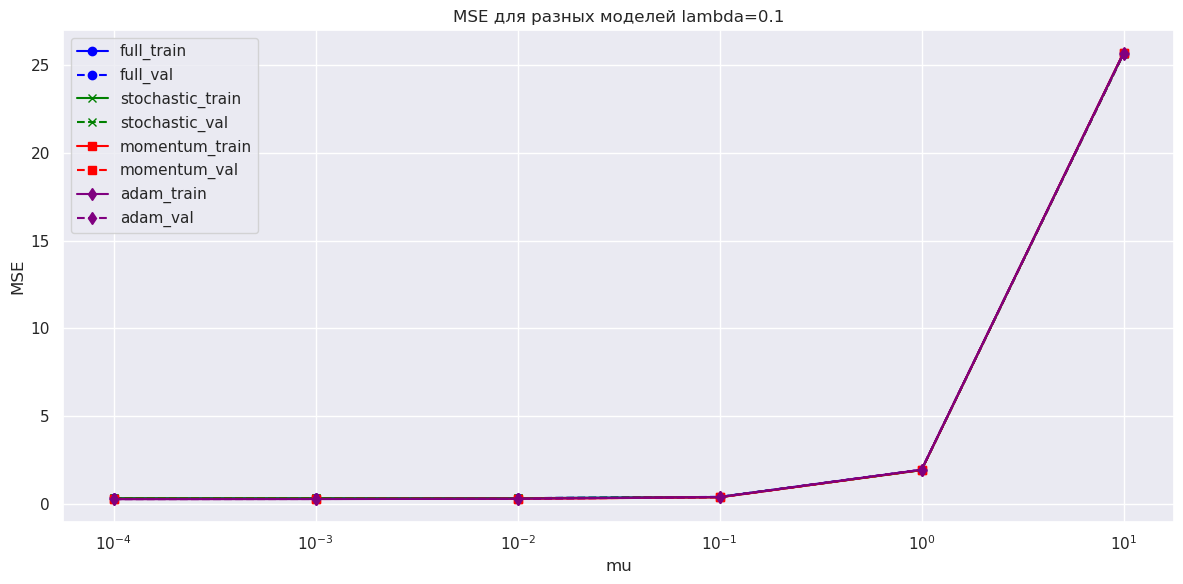

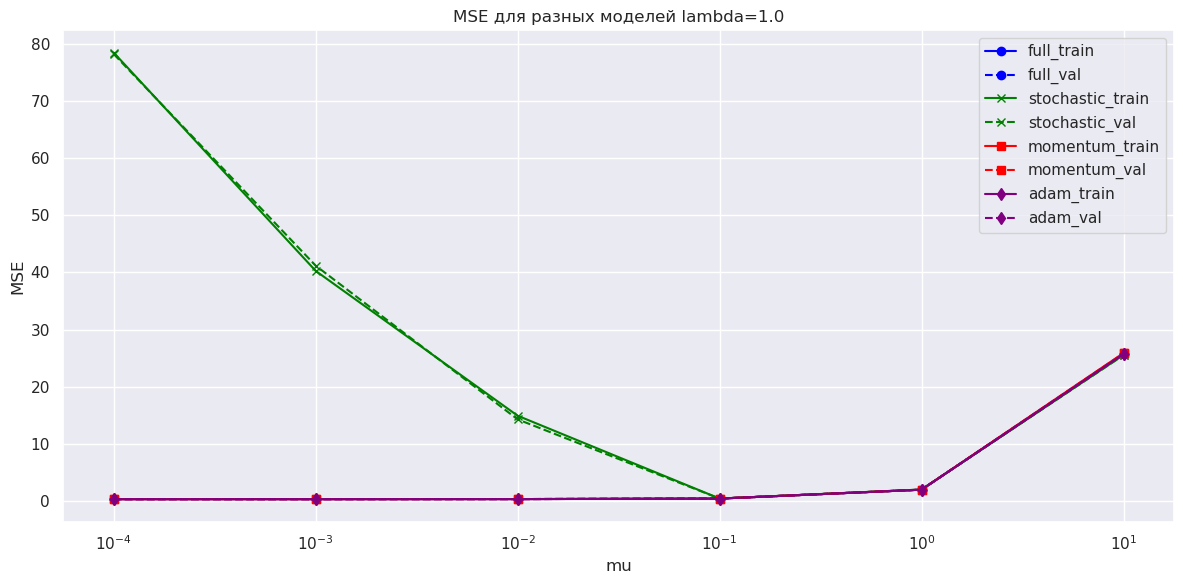

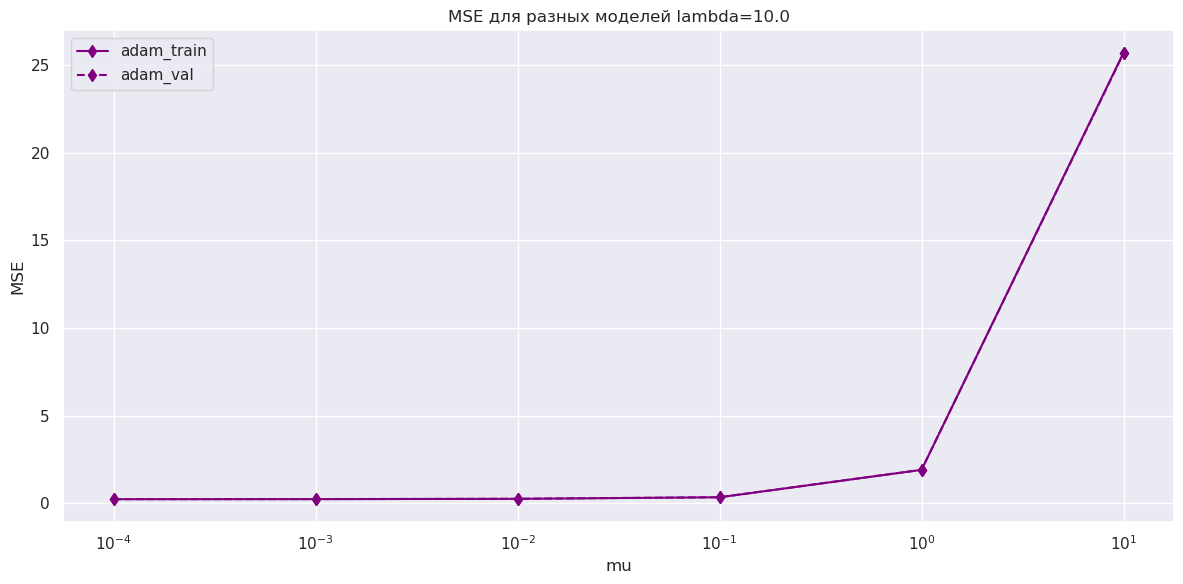

In [116]:
l_list = np.logspace(-3, 1, 5)
mu_list = np.logspace(-4, 1, 6)
methods_list = ['full', 'stochastic', 'momentum', 'adam']

colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']

for l in l_list:
    plt.figure(figsize=(12, 6))
    
    for i, method in enumerate(methods_list):
        # Находим все индексы с нашим l
        l_mu = np.array(res_reg[method]['lambda_reg'])
        l_index = np.where(l_mu[:, 0] == l)[0]
        mu_l = l_mu[l_index][:, 1]

        # Метрика для наших значений l, mu. Обрезал большие значения для наглядности
        scor_val_train = np.array(res_reg[method]['mse_train'])
        scor_val_train = scor_val_train[l_index]
        scor_val_train = np.where(np.isinf(scor_val_train) | (np.abs(scor_val_train) > 10**10), np.nan, scor_val_train)

        scor_val_val = np.array(res_reg[method]['mse_val'])
        scor_val_val = scor_val_val[l_index]
        scor_val_val = np.where(np.isinf(scor_val_val) | (np.abs(scor_val_val) > 10**10), np.nan, scor_val_val)

        # Не строим график, если в нем одни наны
        if not np.all(np.isnan(scor_val_train)):
            plt.plot(mu_l, scor_val_train, label=f"{method}_train", color=colors[i], marker=markers[i])

        if not np.all(np.isnan(scor_val_val)):
            plt.plot(mu_l, scor_val_val, label=f"{method}_val", color=colors[i], marker=markers[i], linestyle='--')

    plt.xscale('log')
    plt.xlabel('mu')
    plt.ylabel('MSE')
    plt.title(f'MSE для разных моделей lambda={l}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

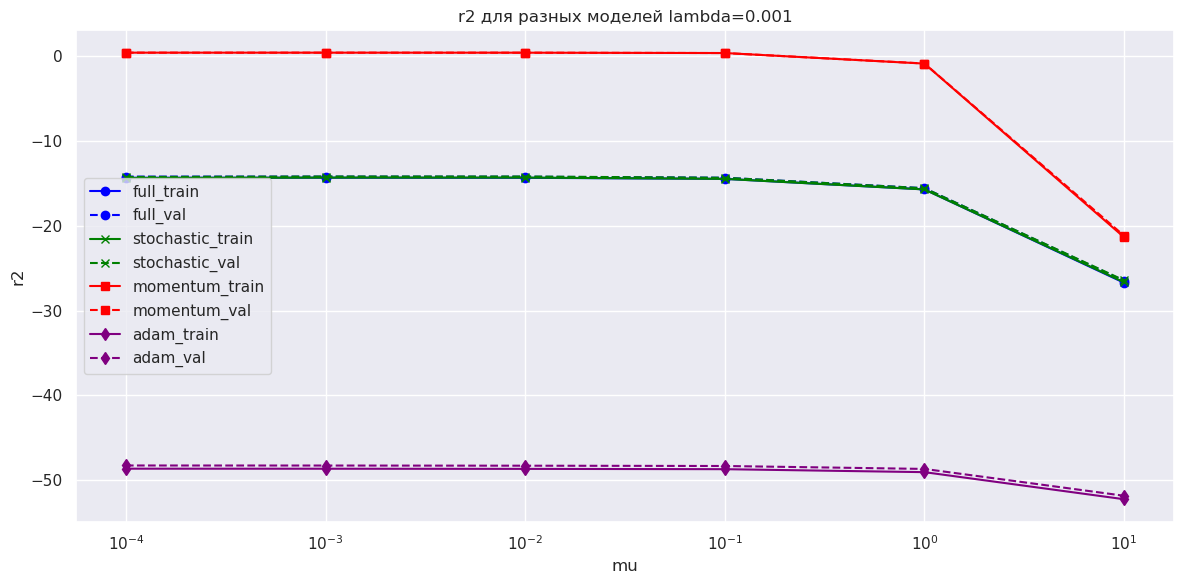

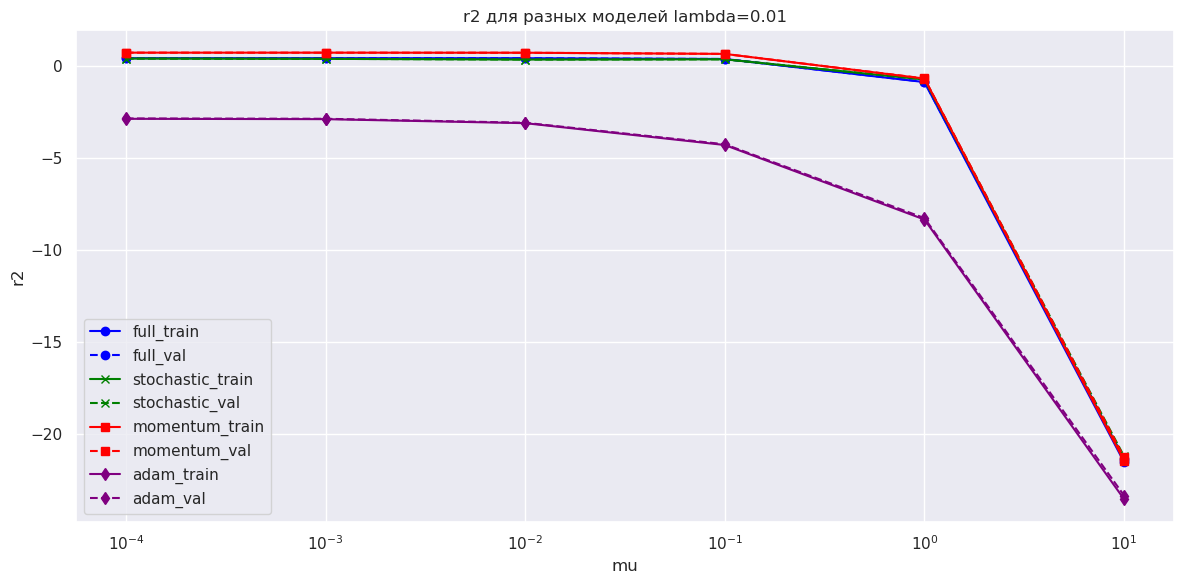

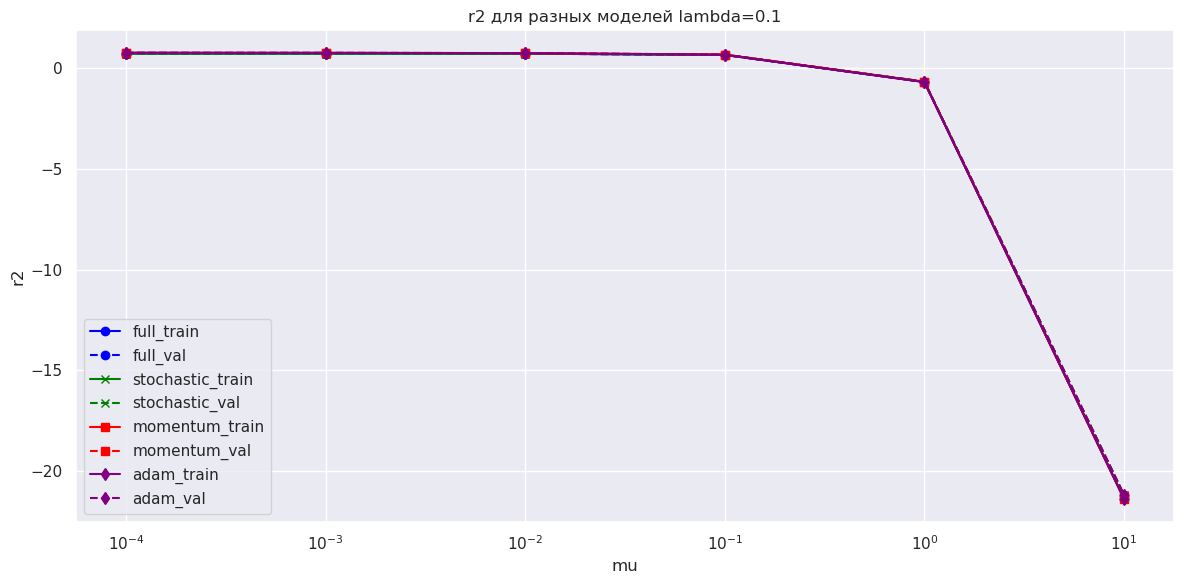

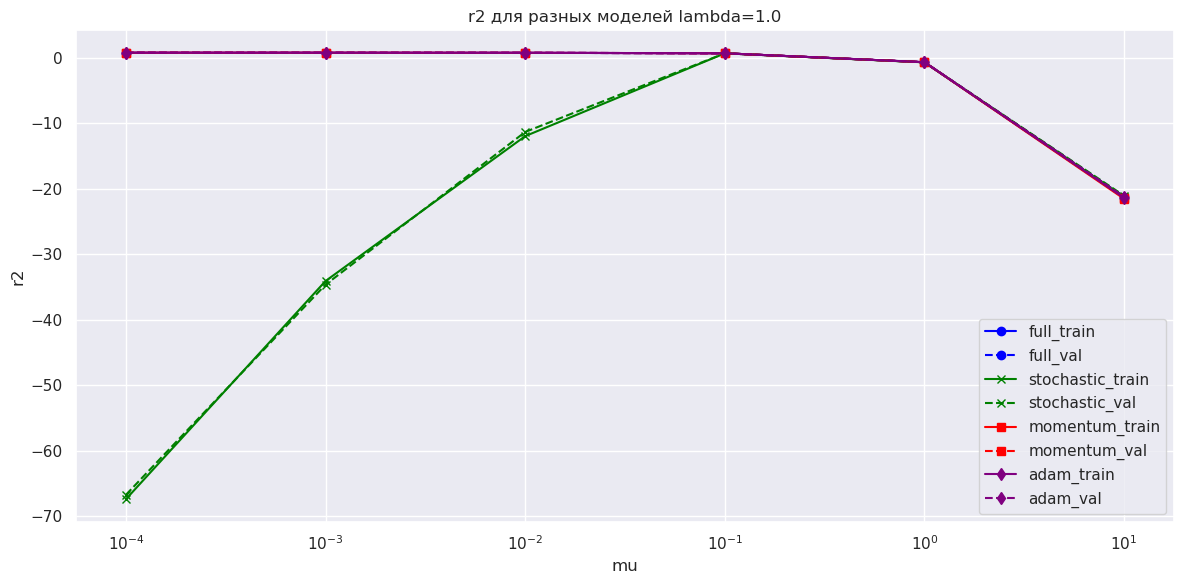

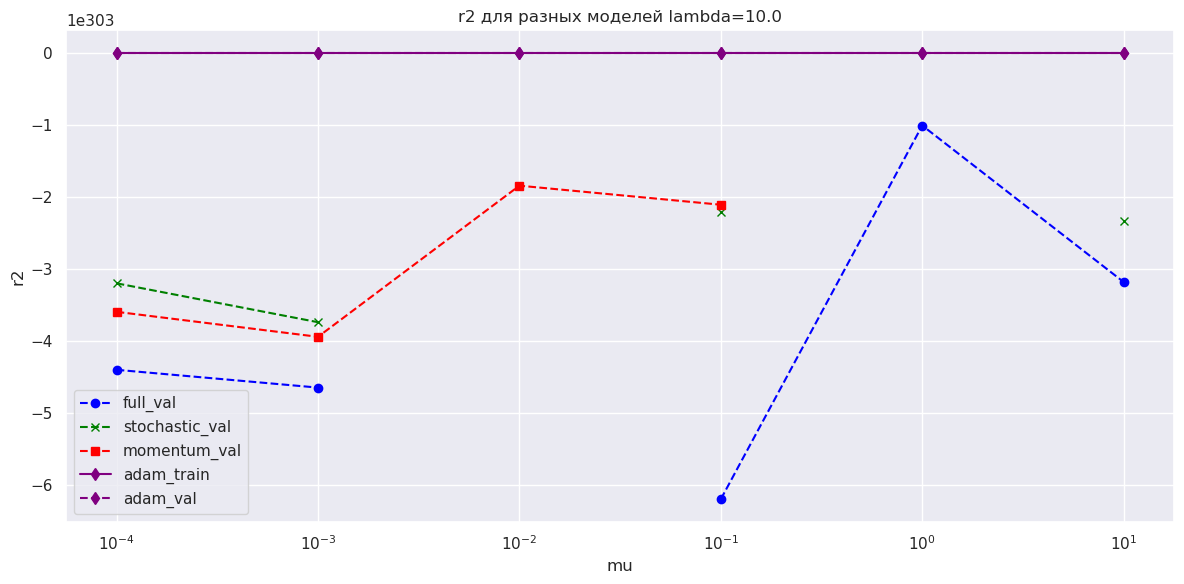

In [117]:
l_list = np.logspace(-3, 1, 5)
mu_list = np.logspace(-4, 1, 6)
methods_list = ['full', 'stochastic', 'momentum', 'adam']

colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']

for l in l_list:
    plt.figure(figsize=(12, 6))
    
    for i, method in enumerate(methods_list):
        # Находим все индексы с нашим l
        l_mu = np.array(res_reg[method]['lambda_reg'])
        l_index = np.where(l_mu[:, 0] == l)[0]
        mu_l = l_mu[l_index][:, 1]

        # Метрика для наших значений l, mu. Обрезал большие значения для наглядности
        scor_val_train = np.array(res_reg[method]['r2_train'])
        scor_val_train = scor_val_train[l_index]
        scor_val_train = np.where(np.isinf(scor_val_train) | (np.abs(scor_val_train) < -10**10), np.nan, scor_val_train)

        scor_val_val = np.array(res_reg[method]['r2_val'])
        scor_val_val = scor_val_val[l_index]
        scor_val_val = np.where(np.isinf(scor_val_val) | (np.abs(scor_val_val) < -10**10), np.nan, scor_val_val)

        # Не строим график, если в нем одни наны
        if not np.all(np.isnan(scor_val_train)):
            plt.plot(mu_l, scor_val_train, label=f"{method}_train", color=colors[i], marker=markers[i])

        if not np.all(np.isnan(scor_val_val)):
            plt.plot(mu_l, scor_val_val, label=f"{method}_val", color=colors[i], marker=markers[i], linestyle='--')

    plt.xscale('log')
    plt.xlabel('mu')
    plt.ylabel('r2')
    plt.title(f'r2 для разных моделей lambda={l}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [125]:
for method in methods_list:
    print(method)
    df_temp = pd.DataFrame(res_reg[method])[['lambda_reg', 'mse_train', 'mse_val', 'mse_test', 'r2_train', 'r2_val','r2_test', 'max_iter']]
    df_temp[['lambda', 'mu']] = pd.DataFrame(df_temp['lambda_reg'].tolist(), index=df_temp.index)
    df_temp = df_temp.drop('lambda_reg', axis=1)
    # Большие числа заменяем на бесконечности для красоты
    df_temp[df_temp > 10**100] = np.inf
    df_temp[df_temp < -10**100] = -np.inf
    df_temp['mse_train'] = round(df_temp['mse_train'], 3)
    df_temp['mse_val'] = round(df_temp['mse_val'], 3)
    df_temp['mse_test'] = round(df_temp['mse_test'], 3)
    df_temp['r2_train'] = round(df_temp['r2_train'], 3)
    df_temp['r2_val'] = round(df_temp['r2_val'], 3)
    df_temp['r2_test'] = round(df_temp['r2_test'], 3)
    df_temp = df_temp[['lambda', 'mu', 'mse_train', 'mse_val', 'mse_test', 'r2_train', 'r2_val','r2_test', 'max_iter']]
    display(df_temp)

full


lambda       mu  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  \
0    0.001   0.0001     17.578   17.545    17.587   -14.319 -14.188  -14.515   
1    0.001   0.0010     17.578   17.545    17.587   -14.318 -14.188  -14.515   
2    0.001   0.0100     17.590   17.557    17.599   -14.329 -14.198  -14.525   
3    0.001   0.1000     17.733   17.699    17.741   -14.453 -14.321  -14.651   
4    0.001   1.0000     19.159   19.124    19.167   -15.696 -15.555  -15.908   
5    0.001  10.0000     31.807   31.759    31.802   -26.718 -26.492  -27.055   
6    0.010   0.0001      0.642    0.647     0.646     0.440   0.440    0.430   
7    0.010   0.0010      0.642    0.647     0.646     0.440   0.440    0.430   
8    0.010   0.0100      0.646    0.650     0.650     0.437   0.437    0.427   
9    0.010   0.1000      0.694    0.699     0.699     0.395   0.395    0.383   
10   0.010   1.0000      2.137    2.140     2.152    -0.863  -0.852   -0.898   
11   0.010  10.0000     25.882   25.842    25.884   -21.555 -21.370  -21.834   
12   0.100   0.0001      0.299    0.301     0.300     0.740   0.740    0.735   
13   0.100   0.0010      0.299    0.301     0.300     0.740   0.739    0.735   
14   0.100   0.0100      0.303    0.305     0.305     0.736   0.736    0.731   
15   0.100   0.1000      0.376    0.379     0.379     0.672   0.672    0.665   
16   0.100   1.0000      1.923    1.927     1.936    -0.676  -0.668   -0.708   
17   0.100  10.0000     25.707   25.668    25.709   -21.402 -21.219  -21.680   
18   1.000   0.0001      0.260    0.264     0.261     0.773   0.772    0.770   
19   1.000   0.0010      0.261    0.264     0.261     0.773   0.771    0.770   
20   1.000   0.0100      0.269    0.272     0.269     0.766   0.764    0.762   
21   1.000   0.1000      0.355    0.359     0.357     0.691   0.690    0.685   
22   1.000   1.0000      1.918    1.921     1.931    -0.671  -0.663   -0.703   
23   1.000  10.0000     25.707   25.667    25.709   -21.402 -21.219  -21.680   
24  10.000   0.0001        inf      inf       inf      -inf    -inf     -inf   
25  10.000   0.0010        inf      inf       inf      -inf    -inf     -inf   
26  10.000   0.0100        inf      inf       inf      -inf    -inf     -inf   
27  10.000   0.1000        inf      inf       inf      -inf    -inf     -inf   
28  10.000   1.0000        inf      inf       inf      -inf    -inf     -inf   
29  10.000  10.0000        inf      inf       inf      -inf    -inf     -inf   

    max_iter  
0       3000  
1       3000  
2       3000  
3       3000  
4       3000  
5       2823  
6       2662  
7       2660  
8       2634  
9       2405  
10      1356  
11       280  
12      3000  
13      3000  
14      2844  
15      1542  
16       226  
17         9  
18      3000  
19      3000  
20      1910  
21       225  
22        40  
23       167  
24       178  
25       178  
26       178  
27       176  
28       160  
29       109

stochastic


lambda       mu  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  \
0    0.001   0.0001     17.626   17.591    17.634   -14.360 -14.228  -14.556   
1    0.001   0.0010     17.563   17.530    17.572   -14.305 -14.175  -14.501   
2    0.001   0.0100     17.563   17.531    17.572   -14.305 -14.176  -14.502   
3    0.001   0.1000     17.736   17.702    17.745   -14.456 -14.324  -14.654   
4    0.001   1.0000     19.167   19.131    19.174   -15.703 -15.561  -15.915   
5    0.001  10.0000     31.737   31.688    31.733   -26.657 -26.431  -26.994   
6    0.010   0.0001      0.669    0.673     0.673     0.417   0.417    0.406   
7    0.010   0.0010      0.686    0.690     0.690     0.403   0.403    0.392   
8    0.010   0.0100      0.730    0.734     0.735     0.364   0.364    0.352   
9    0.010   0.1000      0.715    0.719     0.720     0.377   0.377    0.365   
10   0.010   1.0000      1.977    1.981     1.991    -0.723  -0.715   -0.756   
11   0.010  10.0000     25.733   25.693    25.735   -21.425 -21.241  -21.703   
12   0.100   0.0001      0.298    0.300     0.300     0.740   0.740    0.736   
13   0.100   0.0010      0.299    0.302     0.301     0.739   0.739    0.734   
14   0.100   0.0100      0.303    0.305     0.305     0.736   0.736    0.731   
15   0.100   0.1000      0.367    0.370     0.369     0.681   0.680    0.674   
16   0.100   1.0000      1.906    1.909     1.919    -0.661  -0.653   -0.693   
17   0.100  10.0000     25.690   25.653    25.692   -21.387 -21.206  -21.664   
18   1.000   0.0001     78.538   78.293    78.829   -67.442 -66.774  -68.541   
19   1.000   0.0010     40.279   41.195    40.973   -34.101 -34.660  -35.145   
20   1.000   0.0100     14.881   14.244    14.663   -11.968 -11.330  -11.935   
21   1.000   0.1000      0.358    0.361     0.361     0.688   0.687    0.682   
22   1.000   1.0000      1.941    1.944     1.954    -0.691  -0.683   -0.724   
23   1.000  10.0000     25.536   25.499    25.537   -21.253 -21.074  -21.528   
24  10.000   0.0001        inf      inf       inf      -inf    -inf     -inf   
25  10.000   0.0010        inf      inf       inf      -inf    -inf     -inf   
26  10.000   0.0100        inf      inf       inf      -inf    -inf     -inf   
27  10.000   0.1000        inf      inf       inf      -inf    -inf     -inf   
28  10.000   1.0000        inf      inf       inf      -inf    -inf     -inf   
29  10.000  10.0000        inf      inf       inf      -inf    -inf     -inf   

    max_iter  
0       3000  
1       3000  
2       3000  
3       3000  
4       3000  
5       2856  
6       2209  
7       2233  
8       1510  
9       2102  
10      3000  
11      3000  
12      3000  
13      3000  
14      3000  
15      3000  
16      3000  
17      3000  
18      3000  
19      3000  
20      3000  
21      3000  
22      3000  
23      3000  
24       178  
25       178  
26       178  
27       175  
28       161  
29       109

momentum


lambda       mu  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  \
0    0.001   0.0001      0.642    0.646     0.646     0.441   0.441    0.430   
1    0.001   0.0010      0.642    0.647     0.646     0.440   0.440    0.430   
2    0.001   0.0100      0.646    0.650     0.650     0.437   0.437    0.427   
3    0.001   0.1000      0.693    0.698     0.698     0.396   0.396    0.384   
4    0.001   1.0000      2.122    2.125     2.137    -0.850  -0.840   -0.885   
5    0.001  10.0000     25.647   25.607    25.649   -21.350 -21.167  -21.627   
6    0.010   0.0001      0.298    0.301     0.300     0.740   0.740    0.735   
7    0.010   0.0010      0.299    0.301     0.300     0.740   0.739    0.735   
8    0.010   0.0100      0.303    0.305     0.305     0.736   0.736    0.731   
9    0.010   0.1000      0.376    0.379     0.379     0.673   0.672    0.666   
10   0.010   1.0000      1.919    1.922     1.932    -0.672  -0.664   -0.704   
11   0.010  10.0000     25.803   25.764    25.805   -21.486 -21.302  -21.764   
12   0.100   0.0001      0.260    0.264     0.261     0.773   0.772    0.770   
13   0.100   0.0010      0.261    0.264     0.261     0.773   0.771    0.770   
14   0.100   0.0100      0.269    0.272     0.269     0.766   0.764    0.762   
15   0.100   0.1000      0.354    0.358     0.357     0.691   0.690    0.685   
16   0.100   1.0000      1.913    1.916     1.926    -0.667  -0.659   -0.699   
17   0.100  10.0000     25.727   25.688    25.729   -21.420 -21.236  -21.698   
18   1.000   0.0001      0.247    0.250     0.248     0.785   0.783    0.781   
19   1.000   0.0010      0.249    0.253     0.250     0.783   0.781    0.779   
20   1.000   0.0100      0.266    0.269     0.266     0.769   0.767    0.765   
21   1.000   0.1000      0.355    0.358     0.357     0.691   0.690    0.685   
22   1.000   1.0000      1.921    1.924     1.934    -0.674  -0.666   -0.706   
23   1.000  10.0000     25.870   25.831    25.872   -21.544 -21.360  -21.824   
24  10.000   0.0001        inf      inf       inf      -inf    -inf     -inf   
25  10.000   0.0010        inf      inf       inf      -inf    -inf     -inf   
26  10.000   0.0100        inf      inf       inf      -inf    -inf     -inf   
27  10.000   0.1000        inf      inf       inf      -inf    -inf     -inf   
28  10.000   1.0000        inf      inf       inf      -inf    -inf     -inf   
29  10.000  10.0000        inf      inf       inf      -inf    -inf     -inf   

    max_iter  
0       2647  
1       2645  
2       2619  
3       2389  
4       1311  
5        159  
6       3000  
7       3000  
8       2827  
9       1514  
10       165  
11       118  
12      3000  
13      3000  
14      1895  
15       176  
16       162  
17       152  
18      3000  
19      3000  
20       225  
21       205  
22       219  
23       514  
24       215  
25       215  
26       214  
27       209  
28       178  
29       111

adam


lambda       mu  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  \
0    0.001   0.0001     56.984   56.932    56.953   -48.659 -48.283  -49.242   
1    0.001   0.0010     56.991   56.938    56.960   -48.664 -48.288  -49.248   
2    0.001   0.0100     57.013   56.960    56.981   -48.683 -48.307  -49.267   
3    0.001   0.1000     57.053   56.999    57.021   -48.718 -48.341  -49.302   
4    0.001   1.0000     57.455   57.400    57.425   -49.069 -48.688  -49.659   
5    0.001  10.0000     61.121   61.058    61.086   -52.264 -51.855  -52.889   
6    0.010   0.0001      4.432    4.438     4.432    -2.862  -2.842   -2.910   
7    0.010   0.0010      4.453    4.459     4.453    -2.881  -2.860   -2.929   
8    0.010   0.0100      4.704    4.709     4.706    -3.099  -3.076   -3.151   
9    0.010   0.1000      6.069    6.063     6.073    -4.289  -4.249   -4.358   
10   0.010   1.0000     10.726   10.706    10.745    -8.347  -8.268   -8.479   
11   0.010  10.0000     28.203   28.159    28.202   -23.577 -23.376  -23.879   
12   0.100   0.0001      0.246    0.250     0.248     0.785   0.783    0.781   
13   0.100   0.0010      0.255    0.258     0.256     0.778   0.777    0.774   
14   0.100   0.0100      0.273    0.276     0.274     0.762   0.761    0.758   
15   0.100   0.1000      0.366    0.370     0.369     0.681   0.680    0.674   
16   0.100   1.0000      1.928    1.932     1.942    -0.680  -0.672   -0.713   
17   0.100  10.0000     25.714   25.674    25.716   -21.408 -21.225  -21.686   
18   1.000   0.0001      0.244    0.248     0.245     0.787   0.785    0.784   
19   1.000   0.0010      0.249    0.253     0.250     0.783   0.781    0.779   
20   1.000   0.0100      0.266    0.269     0.266     0.768   0.767    0.765   
21   1.000   0.1000      0.355    0.358     0.357     0.691   0.690    0.685   
22   1.000   1.0000      1.918    1.921     1.931    -0.671  -0.663   -0.703   
23   1.000  10.0000     25.710   25.670    25.712   -21.405 -21.221  -21.682   
24  10.000   0.0001      0.244    0.248     0.245     0.788   0.785    0.784   
25  10.000   0.0010      0.249    0.252     0.250     0.783   0.781    0.780   
26  10.000   0.0100      0.266    0.269     0.266     0.769   0.767    0.765   
27  10.000   0.1000      0.355    0.358     0.357     0.691   0.690    0.685   
28  10.000   1.0000      1.917    1.921     1.930    -0.671  -0.663   -0.703   
29  10.000  10.0000     25.710   25.671    25.713   -21.405 -21.222  -21.683   

    max_iter  
0       3000  
1       3000  
2       3000  
3       3000  
4       3000  
5       1712  
6       3000  
7       3000  
8       3000  
9       3000  
10      3000  
11      3000  
12      3000  
13      3000  
14      3000  
15      3000  
16      1469  
17       152  
18      3000  
19      3000  
20      3000  
21       737  
22       184  
23       165  
24      3000  
25      3000  
26      2601  
27       512  
28       219  
29       218

In [ ]:
# Лучшие значения l, mu
{'full': (1.0, 0.01),
 'stochastic': (0.1, 0.0001), 
 'momentum': (1.0, 0.0001), 
 'adam': (0.1,	0.0001	)}

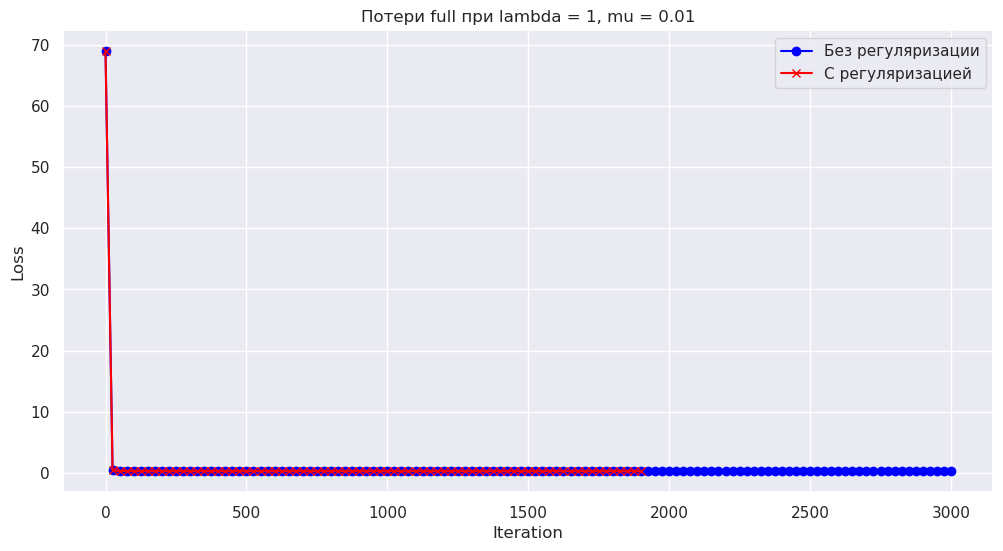

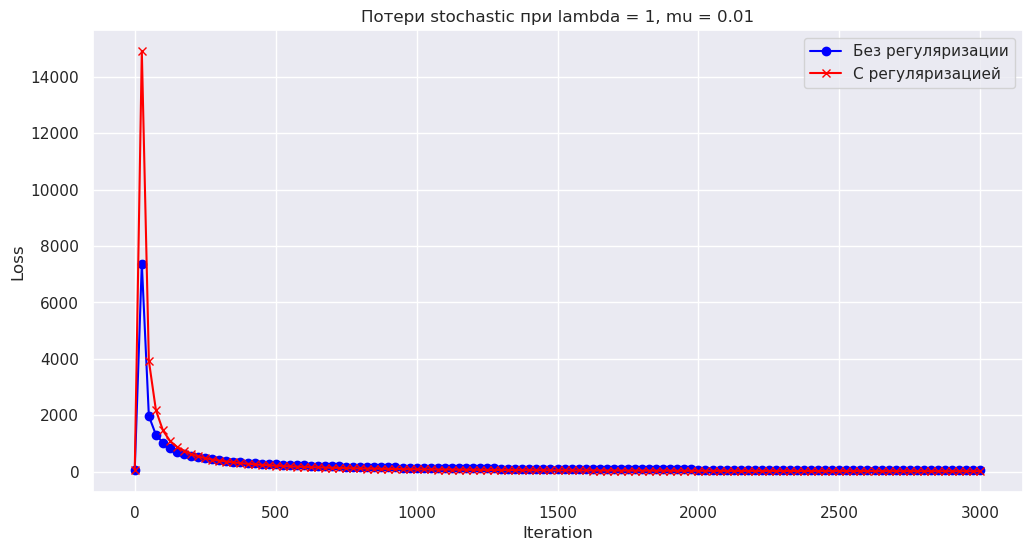

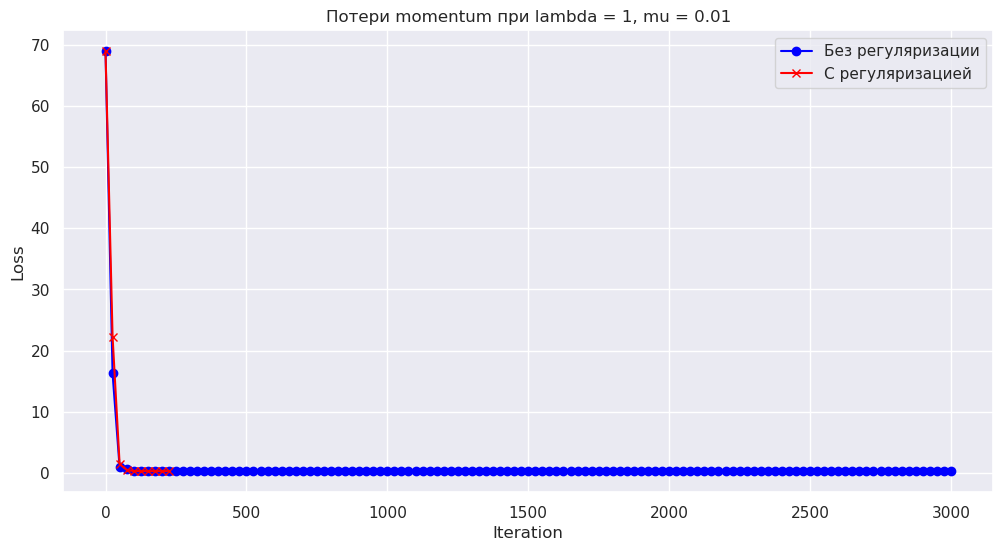

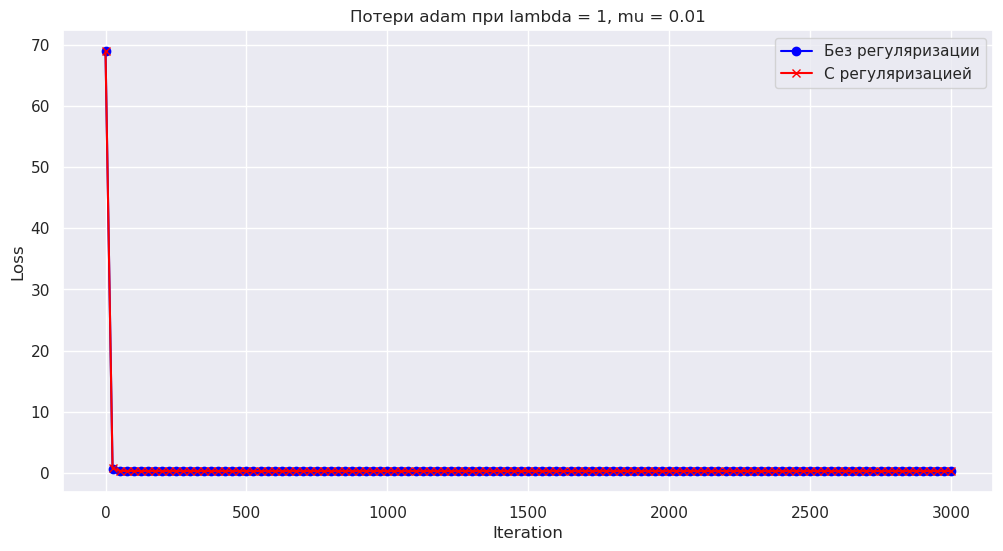

In [200]:
# Посчитаем для lambda=1.0 зависимость лосса от итерации для каждого метода
# mu возьмем для всех 0.01
l = 1
mu = 0.01
n = 25 # будет отображена кажда n-ая точка

colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
num_iter = 3001
for method in methods_list:
    plt.figure(figsize=(12, 6))
    ls = np.array(res[method]['lambda'])
    loss_hist_noreg = res[method]['loss_history'][np.where(ls == l)[0][0]]

    l_mu = np.array(res_reg[method]['lambda_reg'])
    loss_hist_reg = res_reg[method]['loss_history'][np.where((l_mu[:, 0] == l) & (l_mu[:, 1] == mu))[0][0]]

    # добиваем число итераций до максимального
    if len(loss_hist_noreg) < num_iter:
        loss_hist_noreg = loss_hist_noreg + [np.nan] * (num_iter - len(loss_hist_noreg))
    if len(loss_hist_reg) < num_iter:
        loss_hist_reg = loss_hist_reg + [np.nan] * (num_iter - len(loss_hist_reg))
    
    iterations = range(num_iter)[::n]
    plt.plot(iterations, loss_hist_noreg[::n], label=f'Без регуляризации', color='blue', marker='o')
    plt.plot(iterations, loss_hist_reg[::n], label=f'С регуляризацией', color='red', marker='x')

    plt.title(f'Потери {method} при lambda = {l}, mu = {mu}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
# Регуляризация, чаще всего, ускоряет сходимость, не давая весам модели слишком сильно увеличиваться, а соответственно изменяться.
# Это полезное качество для моделей поддверженных переобучению. Хоть на наших данных переобучение не было зафиксировано даже 
# без регуляризации (датасет достаточно большой, плюс я щадяще почистил тяжелый правый хвост, оставив там немного больщих значений) - 
# факт остается фактом, что регуляриация бы очень сильно нам помогла при переобучении. Стоит отметить, что у быстрой сходимости моделей 
# есть и обратная сторона, плохая - иногда модель может сойтись раньше, чем достигнет своего максимально возможного результата. Например, 
# для метода momentum при l=0.01 за 3000 итераций (не было остановок по сходимости) была достигнута mse=0.3 на тестовом датасете,
# для такого же momentum с l=0.01 и mu=0.01 максимальная mse на тесте составила 0.379, что заметно хуже. 
# Что касается сравнения MSE и R2 для меодов с регуляризацией и без нее. В рамках нашей задачи результаты были получены идентичные в 
# обоих случаях (значит лучшие метрики в размере моделей совпадают).
# Увеличение mu сильнее штрафует веса и не дает изм сильно изменяться с большей сильной. Это приводит к быстрой сходимости, но не всегда к лучшему результату
# Меньшие значения lambda приводят к более стабильным обновлениям весов, но увеличивают количество итераций, необходимых для сходимости.


# Делаем вывод. Регуляризация - это полезный интструмент, а для моделей склонных к переобучению просто необходимый для использования 
# инструмент. Особенно полезно может оказаться его использовать для SGD, склонного к резкому изменению весов. 
# Но иногда регуляризация может слишком сильно ограничить способности модели, нее дав ей полностью раскрыть весь свой потенциал.
# для нашей задачи регуляризация оказалась не нужна, у нас и без нее все хорошо

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:
$$
\frac{dL}{da} = \frac{1}{\cosh(a - y)} \cdot \frac{d}{da} \cosh(a - y)
$$

$$
\frac{dL}{da} = \frac{\sinh(a - y)}{\cosh(a - y)} = \tanh(a - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [164]:
import warnings
warnings.filterwarnings('ignore')


In [186]:
from descents import LossFunction

In [187]:
def ret_config(l, method, dim):
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dim, 
            'lambda_': l,
            'loss_function': LossFunction.LogCosh
        }
    }
    return descent_config

In [190]:
l_list = np.logspace(-4, 1, 6)
methods_list = ['full', 'stochastic', 'momentum', 'adam']

res_cosh = {}

for method in tqdm(methods_list):
    res_cosh[method] = {
        'lambda': [],
        'mse_train': [], 'mse_val': [], 'mse_test': [],
        'r2_train': [], 'r2_val': [], 'r2_test': [],
        'max_iter': [], 
        'loss_history': []
    }
    
    for l in l_list:
        model = LinearRegression(descent_config=ret_config(l, method, x_train.shape[1]), 
                                    tolerance=0.0001, max_iter=3000)


        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)
        y_test_pred = model.predict(x_test)
        
        if np.any(np.isnan(y_train_pred)) or np.any(np.isnan(y_val_pred)) or np.any(np.isnan(y_test_pred)):
            # на выходе получились Nan, рассчитать метрики нельзя и не имеет смысла
            mse_train = None
            mse_val = None
            mse_test = None
            r2_train = None
            r2_val = None
            r2_test = None
        else:
            mse_train = mean_squared_error(y_train, y_train_pred)
            mse_val = mean_squared_error(y_val, y_val_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)
            
            r2_train = r2_score(y_train, y_train_pred)
            r2_val = r2_score(y_val, y_val_pred)
            r2_test = r2_score(y_test, y_test_pred)

        res_cosh[method]['lambda'].append(l)
        res_cosh[method]['mse_train'].append(mse_train)
        res_cosh[method]['mse_val'].append(mse_val)
        res_cosh[method]['mse_test'].append(mse_test)
        res_cosh[method]['r2_train'].append(r2_train)
        res_cosh[method]['r2_val'].append(r2_val)
        res_cosh[method]['r2_test'].append(r2_test)
        res_cosh[method]['max_iter'].append(model.iterations)
        res_cosh[method]['loss_history'].append(model.loss_history)

  0%|          | 0/4 [00:00<?, ?it/s]

Достигли сходимости на итерации 3
Достигли сходимости на итерации 332


 25%|██▌       | 1/4 [27:25<1:22:16, 1645.64s/it]

Достигли сходимости на итерации 3
Достигли сходимости на итерации 334


 50%|█████     | 2/4 [36:52<33:42, 1011.29s/it]  

Достигли сходимости на итерации 341


 75%|███████▌  | 3/4 [1:10:41<24:35, 1475.84s/it]

Достигли сходимости на итерации 308


100%|██████████| 4/4 [1:41:09<00:00, 1517.35s/it]

Достигли сходимости на итерации 1565


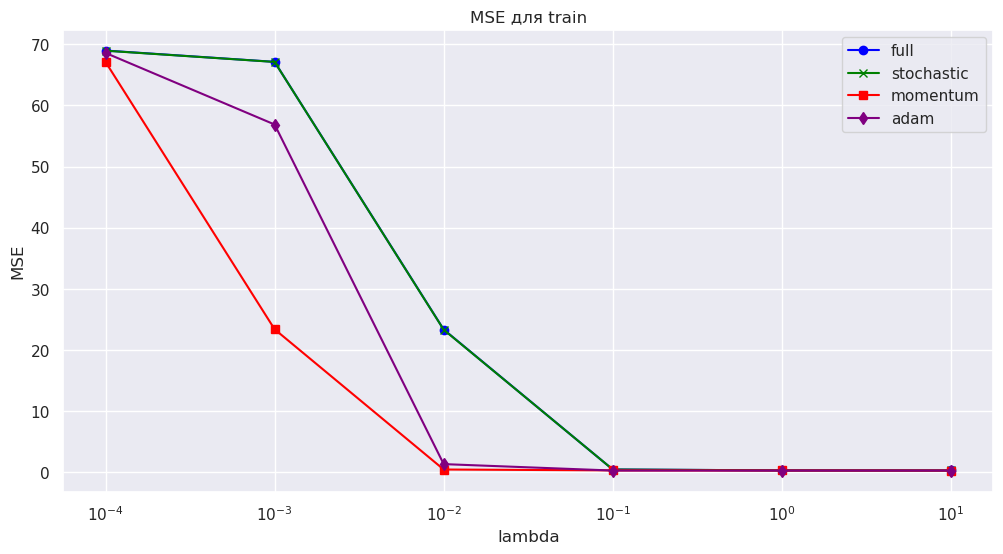

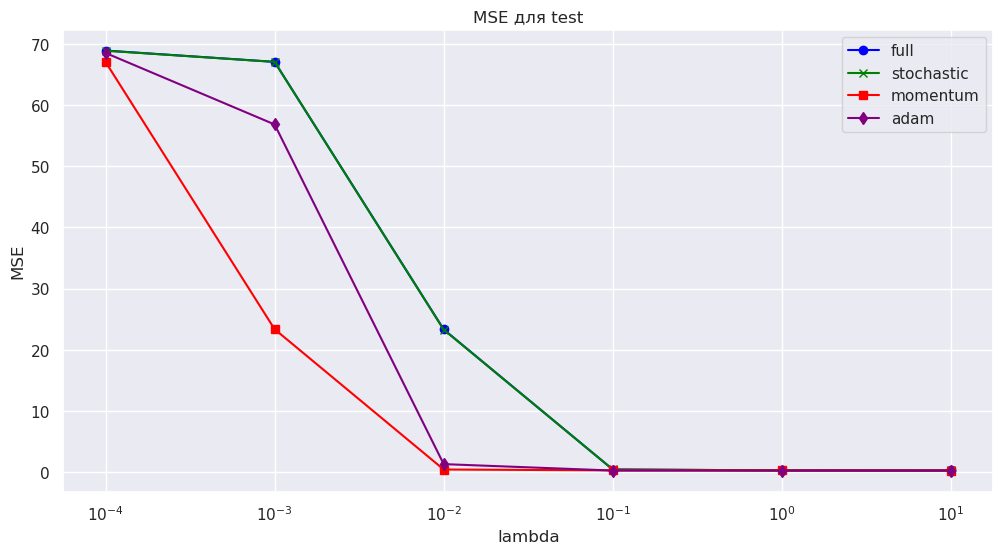

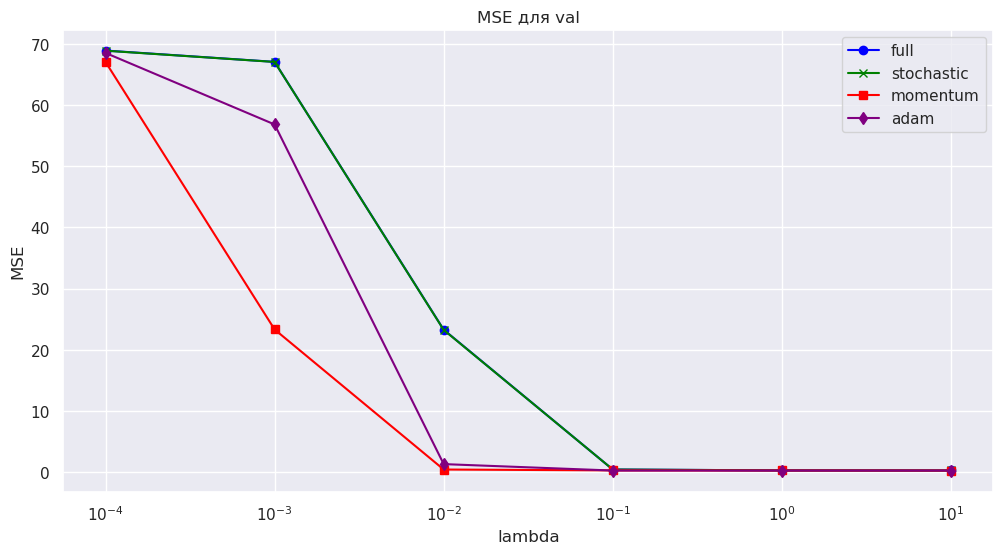

In [193]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list, res_cosh[method][f'mse_{mode}'], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'MSE для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

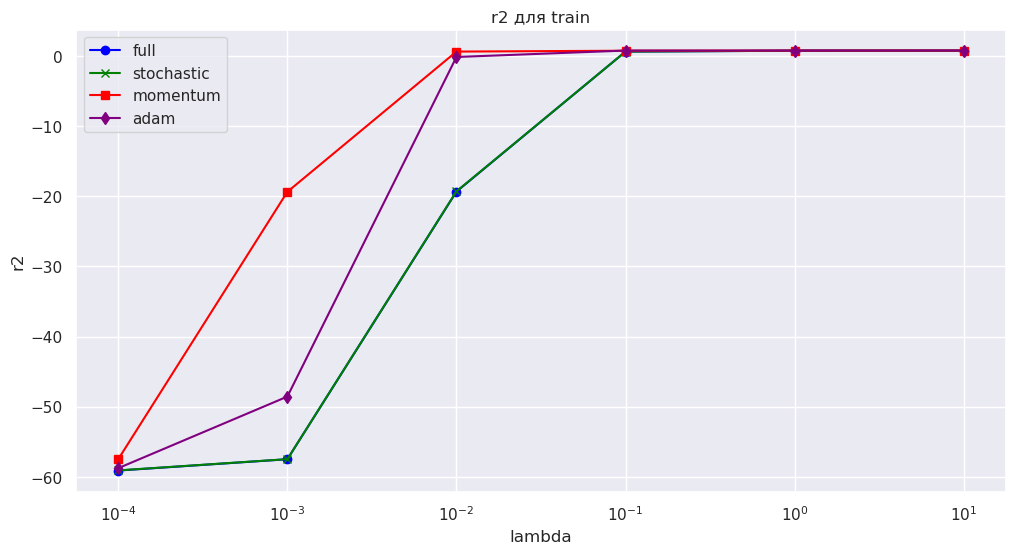

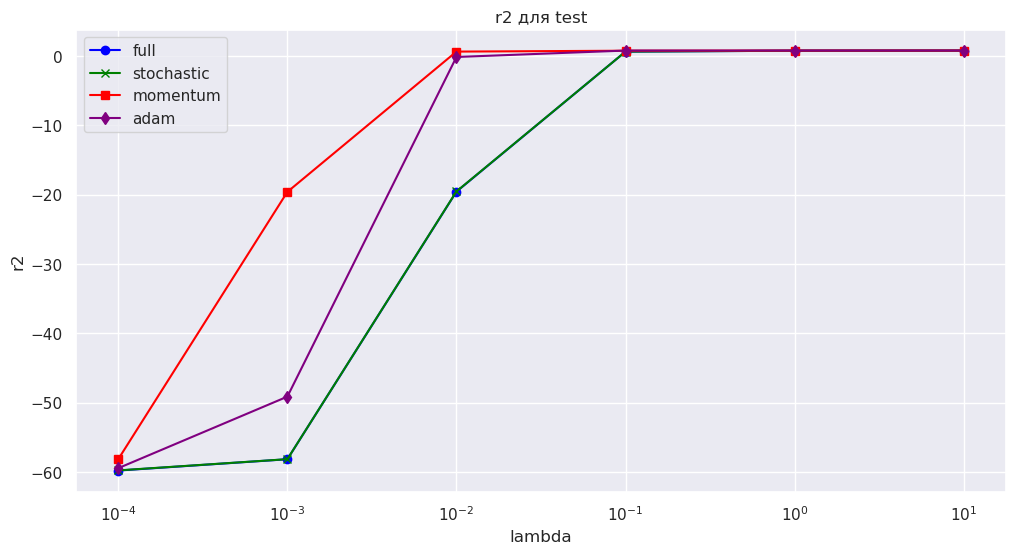

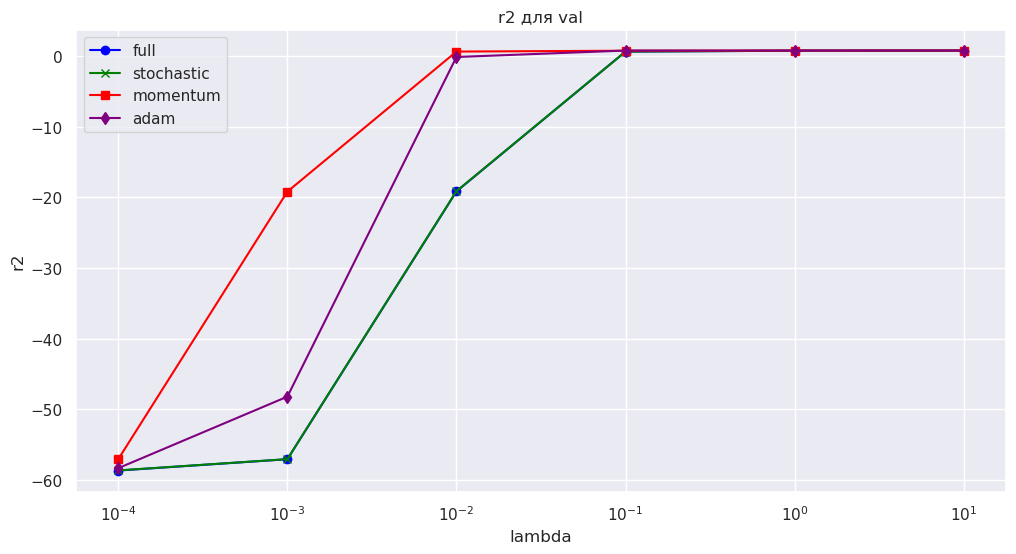

In [195]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
mode_l = ['train', 'test', 'val']

for mode in mode_l:
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods_list):
        plt.plot(l_list, res_cosh[method][f'r2_{mode}'], label=f'{methods_list[i]}', color=colors[i], marker=markers[i])
    plt.title(f'r2 для {mode}')
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('r2')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [196]:
# Из за того, что для больших ошибок наша новая функция использует не квадрат ошибки, а значению близкое к относительной разнице -
#  наши градиенты не взрываются и веса вместе с лоссом не улетают в космос. Уже за это можно сказать ей большое спасибо!
# В остальном же графики mse и r2 в зависимости от lambda очень похожи на графики из  пункта 5 (только чище и опрятнее)

In [197]:
for method in methods_list:
    print(method)
    df_temp = pd.DataFrame(res_cosh[method])[['lambda', 'mse_train', 'mse_val', 'mse_test', 'r2_train', 'r2_val','r2_test', 'max_iter']]
    # Большие числа заменяем на бесконечности для красоты
    df_temp[df_temp > 10**100] = np.inf
    df_temp[df_temp < -10**100] = -np.inf
    df_temp['mse_train'] = round(df_temp['mse_train'], 3)
    df_temp['mse_val'] = round(df_temp['mse_val'], 3)
    df_temp['mse_test'] = round(df_temp['mse_test'], 3)
    df_temp['r2_train'] = round(df_temp['r2_train'], 3)
    df_temp['r2_val'] = round(df_temp['r2_val'], 3)
    df_temp['r2_test'] = round(df_temp['r2_test'], 3)
    display(df_temp)

full


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     68.980   68.904    68.931   -59.112 -58.647  -59.809         3
1   0.0010     67.129   67.054    67.082   -57.499 -57.045  -58.178       332
2   0.0100     23.332   23.277    23.325   -19.332 -19.150  -19.577      3000
3   0.1000      0.420    0.423     0.422     0.634   0.633    0.628      3000
4   1.0000      0.279    0.283     0.279     0.757   0.755    0.754      3000
5  10.0000      0.260    0.265     0.260     0.773   0.770    0.770      3000

stochastic


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     68.956   68.881    68.908   -59.091 -58.627  -59.788         3
1   0.0010     67.117   67.042    67.070   -57.489 -57.035  -58.167       334
2   0.0100     23.297   23.241    23.291   -19.302 -19.118  -19.547      3000
3   0.1000      0.422    0.425     0.423     0.633   0.632    0.627      3000
4   1.0000      0.280    0.284     0.279     0.756   0.754    0.754      3000
5  10.0000      0.263    0.269     0.263     0.771   0.767    0.768      3000

momentum


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     67.119   67.044    67.073   -57.491 -57.037  -58.169       341
1   0.0010     23.370   23.316    23.364   -19.366 -19.184  -19.611      3000
2   0.0100      0.420    0.424     0.422     0.634   0.633    0.628      3000
3   0.1000      0.280    0.284     0.279     0.756   0.754    0.754      3000
4   1.0000      0.260    0.265     0.260     0.774   0.771    0.771      3000
5  10.0000      0.252    0.258     0.253     0.780   0.777    0.777      3000

adam


lambda  mse_train  mse_val  mse_test  r2_train  r2_val  r2_test  max_iter
0   0.0001     68.588   68.514    68.541   -58.771 -58.309  -59.464       308
1   0.0010     56.876   56.824    56.845   -48.564 -48.189  -49.147      3000
2   0.0100      1.304    1.310     1.303    -0.137  -0.134   -0.149      3000
3   0.1000      0.251    0.257     0.252     0.781   0.777    0.777      3000
4   1.0000      0.251    0.257     0.251     0.781   0.778    0.778      3000
5  10.0000      0.251    0.257     0.251     0.781   0.778    0.778      1565

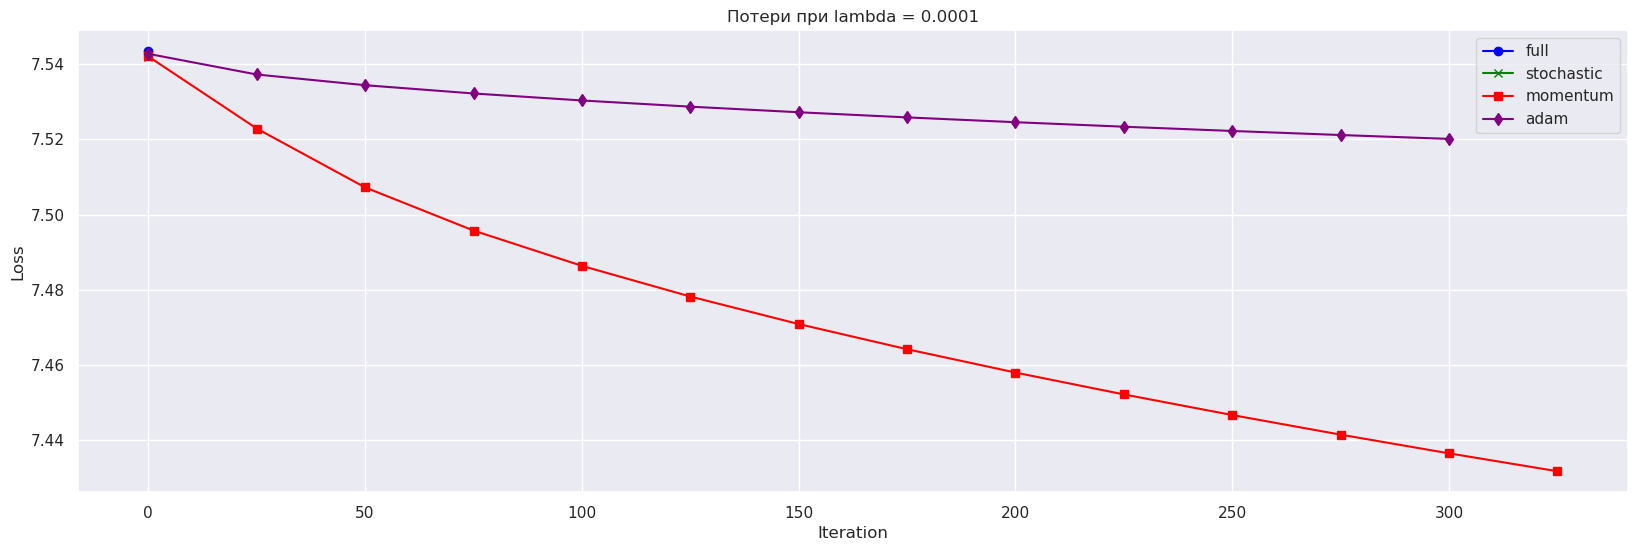

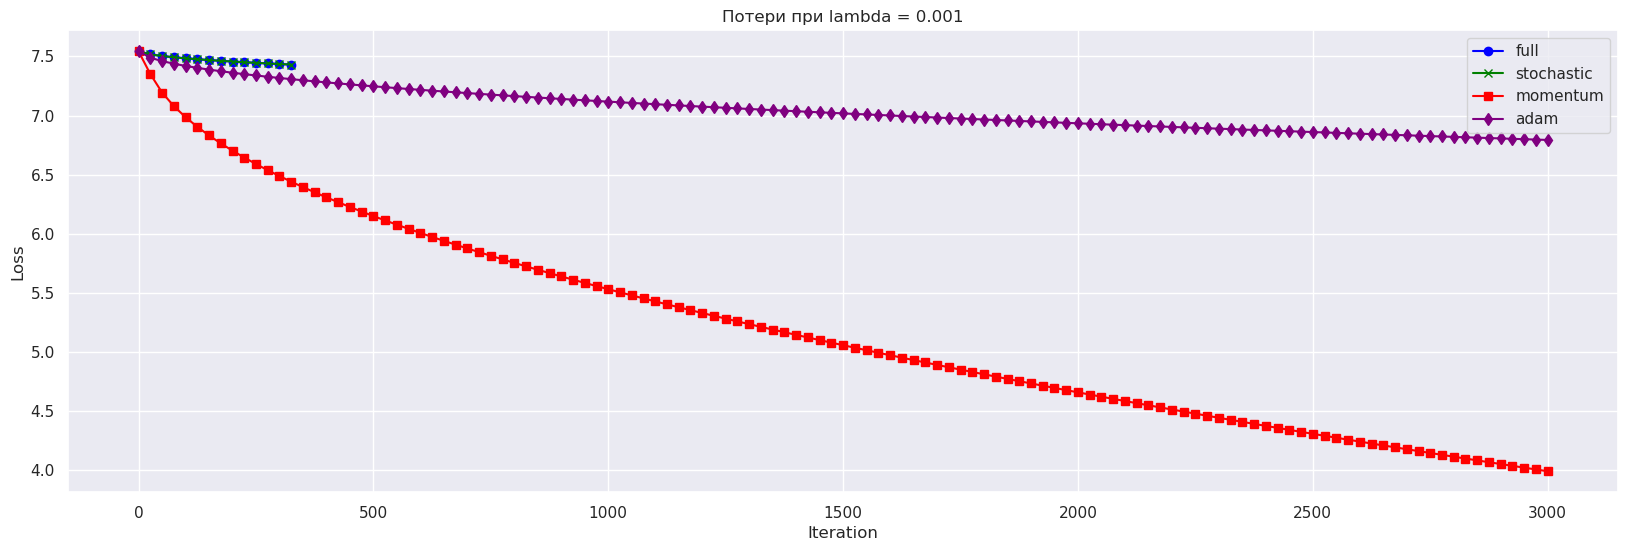

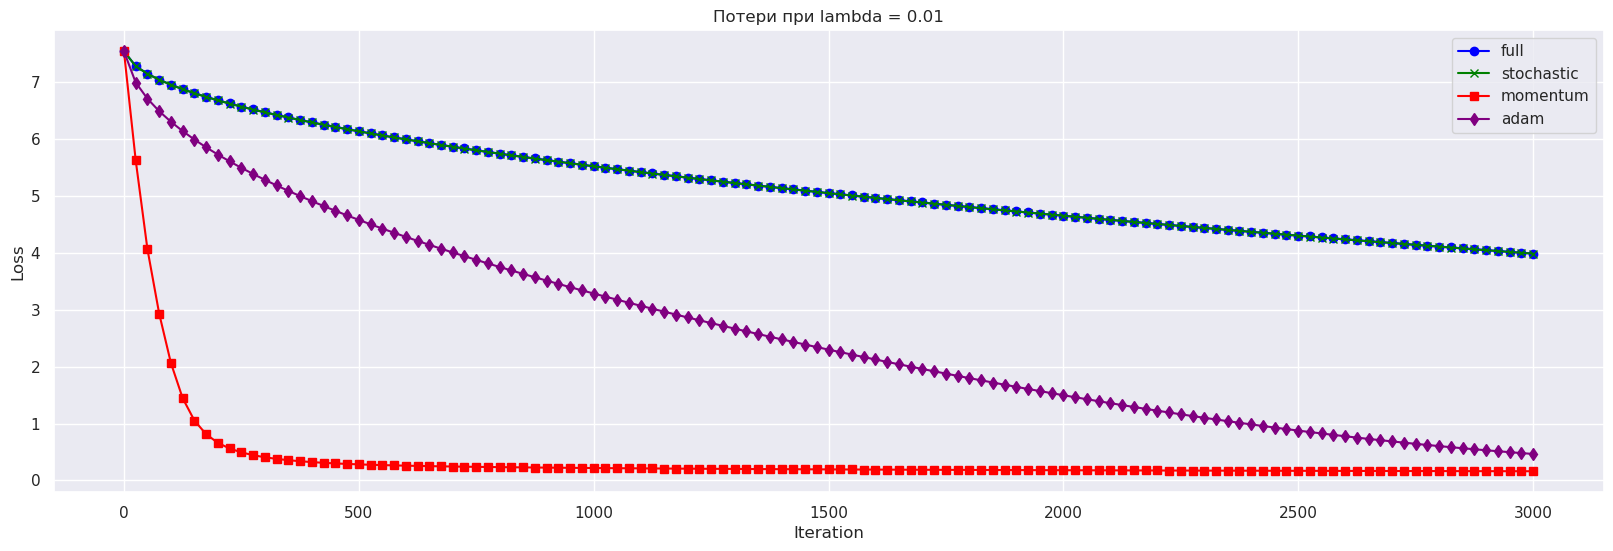

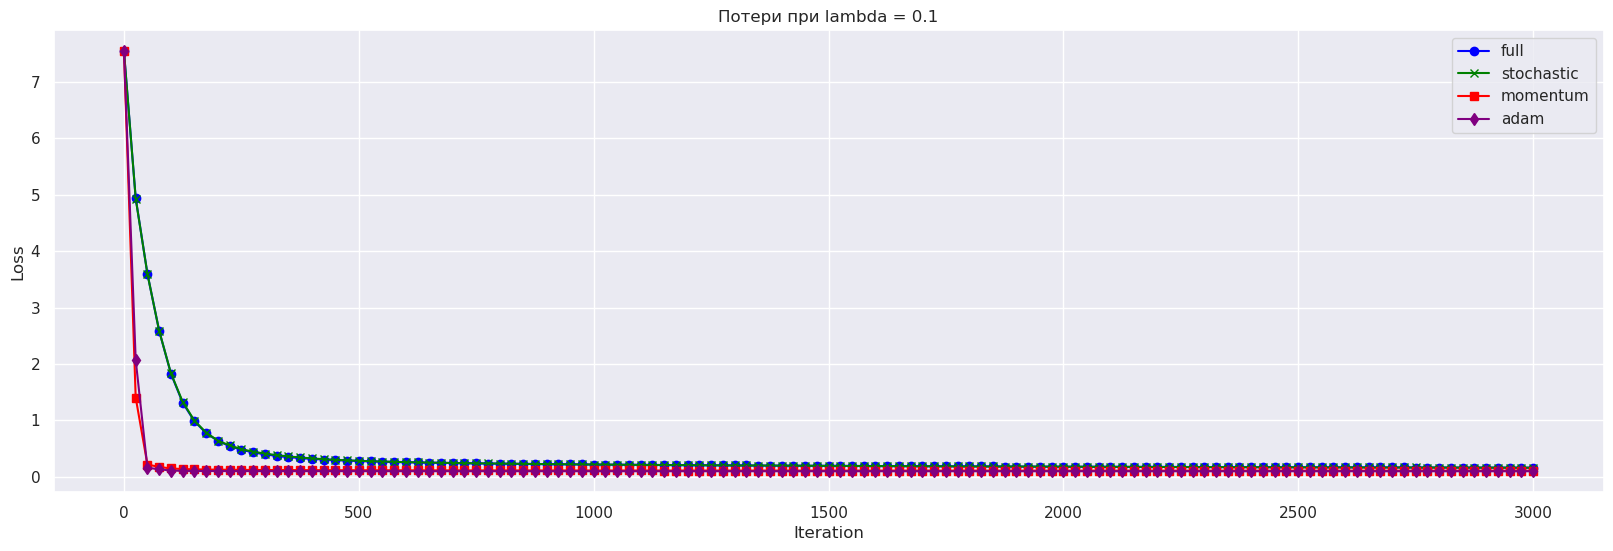

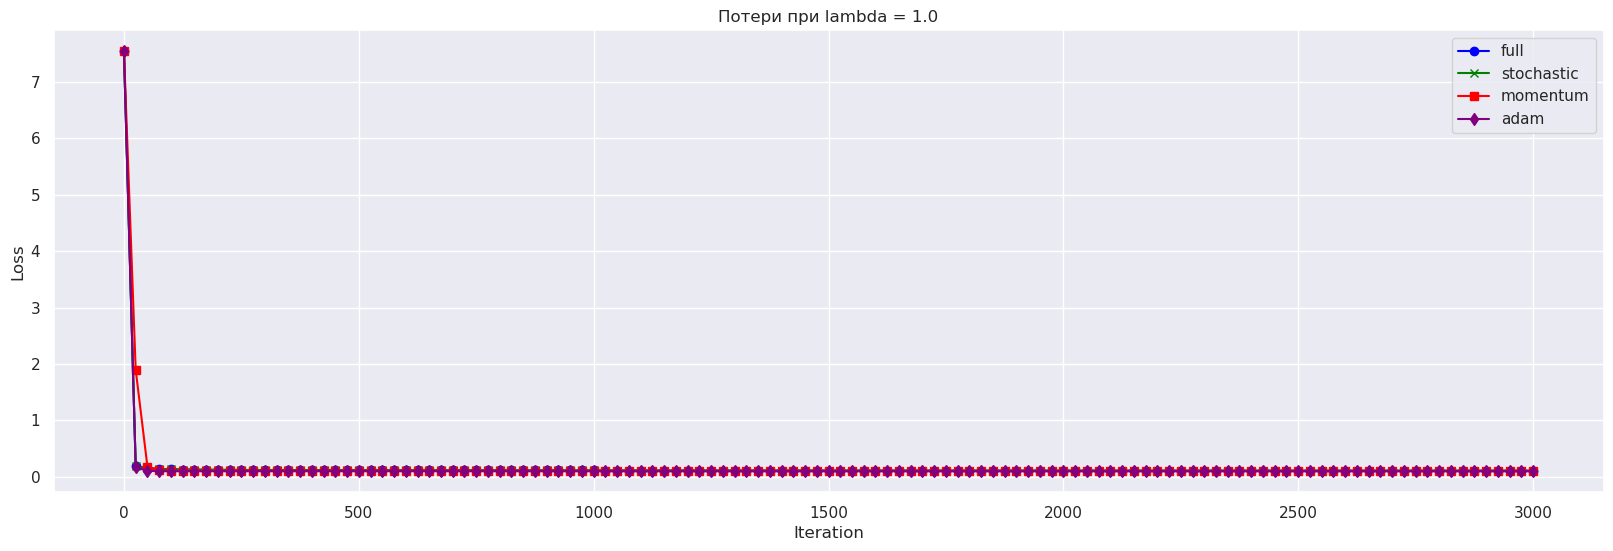

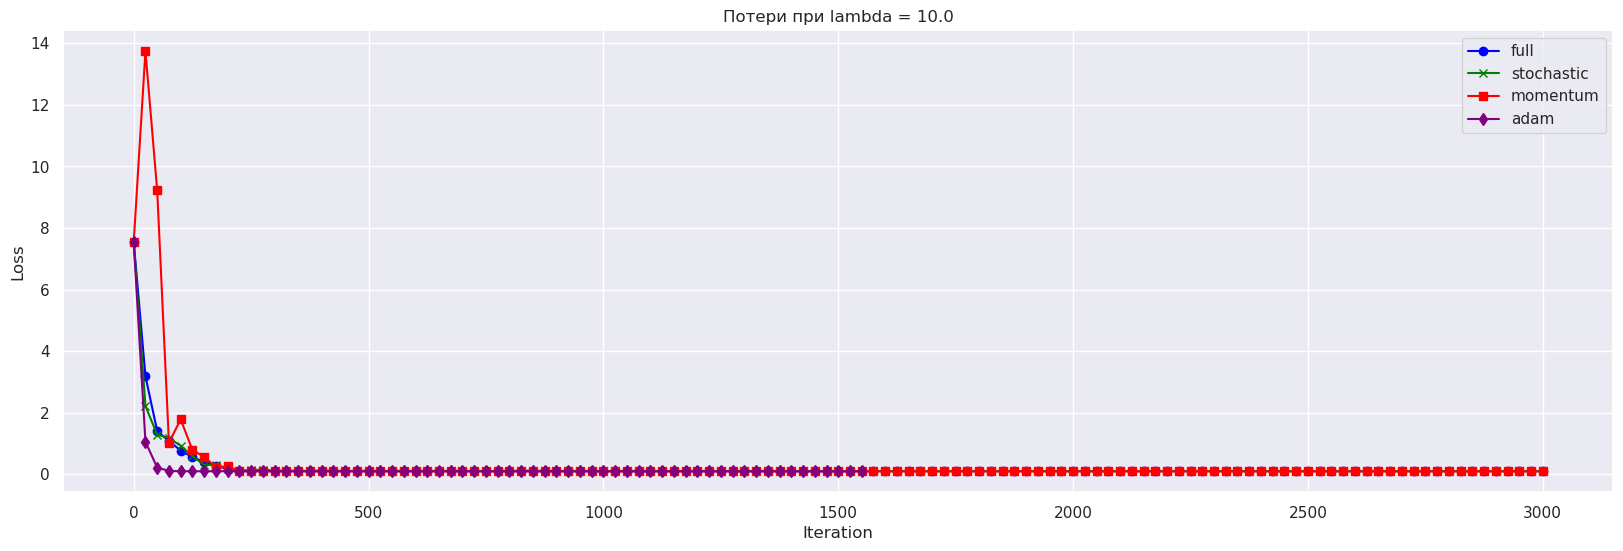

In [199]:
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'x', 's', 'd']
num_iter = 3001

n = 25 # Каждая n-ая точка для нормальной картинки
for j, l in enumerate(l_list):
    plt.figure(figsize=(20, 6))
    for i, method in enumerate(methods_list):
        loss_hist = res_cosh[method]['loss_history'][j]
        if len(loss_hist) < num_iter:
            loss_hist = loss_hist + [np.nan] * (num_iter - len(loss_hist))
        
        iterations = range(num_iter)[::n]
        loss_hist = loss_hist[::n]
        plt.plot(iterations, loss_hist, label=f'{methods_list[i]}', color=colors[i], marker=markers[i])

    plt.title(f'Потери при lambda = {l}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Показать график
    plt.show()

In [ ]:
# Лучшие значения l
{'full': 10.0,
 'stochastic': 10.0, 
 'momentum': 10.0, 
 'adam': 10.0}

In [ ]:
# Для маленьких lambda наши модели очень быстро сошлись. Ну а как еще? Имеет неквадратичный лосс, умноженный на маленькое число. 
# Тут банально невозможны сильные изменения веса. Так что сходимость мнимая.
# Для методов, которым характерно скачкообразное изменение весов (full, sgd) скорость сходимости к хорошему лоссу уменьшилась. 
# Опять же потому что теперь изменения происходят не на квадрат значений, а значит удалось избавиться от резкости движений.
# Для остальных моделей тоже уменишилась скорость сходимости, но не так сильно (все таки они более стабильные сами по себе). Может быть поэтому 
# все модели со своими лучшими lambda показали результат за 3000 итераций чуть хуже, чем с MSE (не успели просто)
# А еще все модели показали свои лучшие результаты с максимально возможной скоростью обучения (l=10). Не факт, что так было бы если 
# бы я сравнивал на 5-10 тысячах итераций, но тоже интересный факт.
# Скорее всего, если бы у нас были явные выбросы, то мы бы увидели более значительную разницу между этими двумя функциями, 
# так как logcosh менее подвержена выбросам и обладает большей стабильностью

# Лучшей моделью десь однозначно стоит признать адама. Помимо того, что он показал лучший результат - он еще и истинно сошелся на 1.5к итерациях

In [203]:
# ура, я закончил